# Laboratorio 2 Data Science
- Diego Linares #221256
- Jos√© Prince #22087

In [653]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
archivo = "dataset/Estadisticas_historicas_comercializacion.xlsx"

df_importacion = pd.read_excel(archivo, sheet_name="IMPORTACION", skiprows=6, nrows=289 )
df_consumo = pd.read_excel(archivo, sheet_name="CONSUMO", skiprows=6, nrows=301 ) 
#Aca arriba lo que hicimos fue leer los archivos de excel y saltar las primeras 6 filas que son encabezados y no nos interesan.
#Tambien especificamos el numero de filas que queremos leer, en este caso 289 para importacion y 301 para consumo.

# Renombrar columnas para facilitar
cols_import = df_importacion.columns.tolist()
cols_consumo = df_consumo.columns.tolist()

print("Columnas Importaci√≥n:")
print(cols_import)

print("\nColumnas Consumo:")
print(cols_consumo)

Columnas Importaci√≥n:
['Fecha', 'Aceites lubricantes', 'Asfalto ', 'Bunker', 'Ceras', 'Combustible turbo jet', 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gas licuado de petr√≥leo', 'Gasolina de aviaci√≥n', 'Gasolina regular', 'Gasolina superior', 'Grasas lubricantes', 'Kerosina', 'Mezclas oleosas', 'Naftas', 'Petcoke', 'Petr√≥leo crudo', 'Solventes', 'Butano', 'Diesel alto azufre', 'MTBE', 'Orimulsi√≥n', 'Petr√≥leo reconstituido', 'Total importaci√≥n']

Columnas Consumo:
['Fecha', 'Aceites lubricantes', 'Asfalto', 'Bunker', 'Ceras', 'Combustible turbo jet', 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gas licuado de petr√≥leo', 'Gas natural', 'Gasolina de aviaci√≥n', 'Gasolina regular', 'Gasolina superior', 'Grasas lubricantes', 'Kerosina', 'Mezclas\noleosas', 'Naftas', 'PetCoke', 'Petr√≥leo crudo', 'Solventes', 'Butano', 'Diesel alto azufre', 'Orimulsi√≥n', 'Total']


Bien logramos identificar las columnas importantes ahora vamos a solo a agarrar las que nos interesan. 

In [654]:
df_importacion = df_importacion[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']]
df_consumo = df_consumo[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']]

Vamos a analizar como viene formateada la fecha.. 

In [655]:
print(df_importacion['Fecha'].head())

0   2001-01-01
1   2001-02-01
2   2001-03-01
3   2001-04-01
4   2001-05-01
Name: Fecha, dtype: datetime64[ns]


MMm es tipo object asi que la vamos a transformar a datetime

In [656]:
df_importacion['Fecha'] = pd.to_datetime(df_importacion['Fecha'])
df_consumo['Fecha'] = pd.to_datetime(df_consumo['Fecha'])

In [657]:
print(df_importacion['Fecha'].dtype)


datetime64[ns]


Ya que trabajaremos series de tiempo, conviene que Fecha sea el √≠ndice del dataframe:

In [658]:
df_importacion.set_index('Fecha', inplace=True)
df_consumo.set_index('Fecha', inplace=True)


In [659]:
print("Importaci√≥n:")
print(f"Inicio: {df_importacion.index.min()}")
print(f"Fin: {df_importacion.index.max()}")
print(f"N√∫mero de registros: {len(df_importacion)}")

print("\nConsumo:")
print(f"Inicio: {df_consumo.index.min()}")
print(f"Fin: {df_consumo.index.max()}")
print(f"N√∫mero de registros: {len(df_consumo)}")


Importaci√≥n:
Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
N√∫mero de registros: 288

Consumo:
Inicio: 2000-01-01 00:00:00
Fin: 2024-12-01 00:00:00
N√∫mero de registros: 300


## An√°lisis exploratorio

Ya que tenemos los datasets limpios, vamos a realizar un analisis univariado para cada uno de los datasets que tenemos. Primero seria buenos analizar las estad√≠sticas descriptivas que tenemos para nuestros datasets:

In [660]:
print(df_importacion.describe())

       Gasolina regular  Gasolina superior  Diesel alto azufre
count      2.880000e+02       2.880000e+02        2.880000e+02
mean       4.129493e+05       4.909544e+05        5.541217e+05
std        2.432627e+05       1.565581e+05        4.097571e+05
min        8.101530e+04       1.702925e+05        0.000000e+00
25%        2.082069e+05       3.693299e+05        0.000000e+00
50%        3.275593e+05       4.813002e+05        6.380928e+05
75%        5.761171e+05       6.083053e+05        8.447706e+05
max        1.141366e+06       1.227174e+06        1.595699e+06


A partir del an√°lisis estad√≠stico descriptivo del dataset **df_importacion**, se observa que el volumen promedio de importaci√≥n de combustibles ha sido mayor para el di√©sel alto azufre (554,121 unidades), seguido de la gasolina superior (490,954) y la gasolina regular (412,949). La dispersi√≥n es m√°s significativa en el caso del di√©sel, con una desviaci√≥n est√°ndar de m√°s de 400,000 unidades, y se evidencia una asimetr√≠a en la distribuci√≥n, ya que el 25% de los valores de di√©sel son exactamente cero, indicando largos periodos sin importaci√≥n de este tipo de combustible**. En cambio, las gasolinas presentan una distribuci√≥n m√°s regular, aunque tambi√©n con diferencias marcadas entre los valores m√≠nimos y m√°ximos, lo que sugiere fluctuaciones importantes en los vol√∫menes de importaci√≥n a lo largo del tiempo.


In [661]:
print(df_consumo.describe())

       Gasolina regular  Gasolina superior  Diesel alto azufre
count        300.000000         300.000000        3.000000e+02
mean      397478.894458      470248.678849        5.144313e+05
std       219102.049432      113504.653305        3.688977e+05
min       160741.900000      300242.781667        0.000000e+00
25%       215650.312917      383931.904375        0.000000e+00
50%       288193.130000      423319.540000        6.721700e+05
75%       548073.682500      573704.195000        7.791021e+05
max       938086.570000      786598.120000        1.149175e+06


El an√°lisis descriptivo del dataset **df_consumo** revela que, en promedio, el di√©sel alto azufre es el combustible m√°s consumido (514,431 unidades), seguido de la gasolina superior (470,249) y la gasolina regular (397,479). Al igual que en las importaciones, el di√©sel presenta una alta variabilidad (desviaci√≥n est√°ndar de \~368,898) y un valor m√≠nimo de consumo de cero, lo cual sugiere periodos sin uso reportado o una posible ausencia en el suministro. En cuanto a las gasolinas, el consumo es m√°s estable y continuo, con menores desviaciones y valores m√≠nimos significativamente m√°s altos que los del di√©sel. Esto indica que, aunque el consumo de gasolina var√≠a con el tiempo, no presenta interrupciones bruscas como el di√©sel. Adem√°s, los valores m√°ximos de consumo de gasolina regular y superior (938,086 y 786,598 respectivamente) evidencian eventos de alta demanda, posiblemente asociados a factores estacionales o econ√≥micos.

Ya que tenemos la informaci√≥n inicial sobre como es la data que se tiene en cada uno de los datasets ahora se visualizara la data en histogramas para analizar su comportamiento.

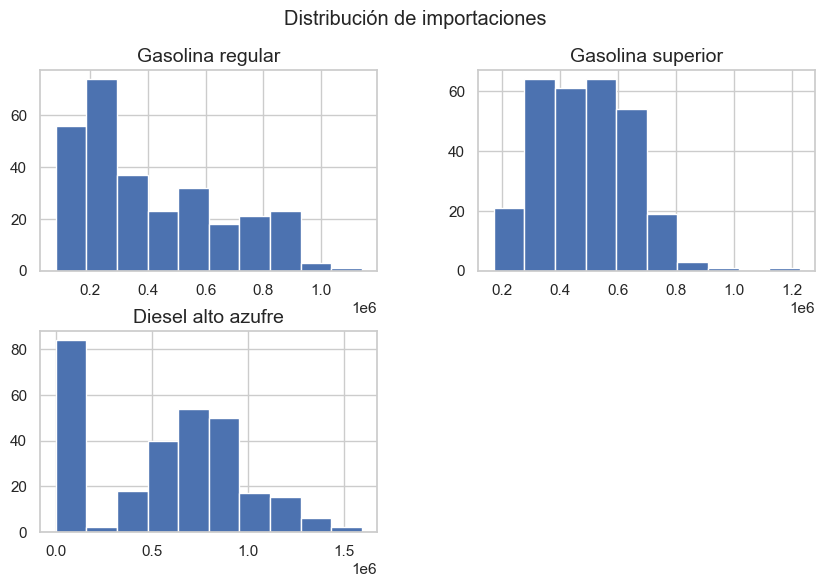

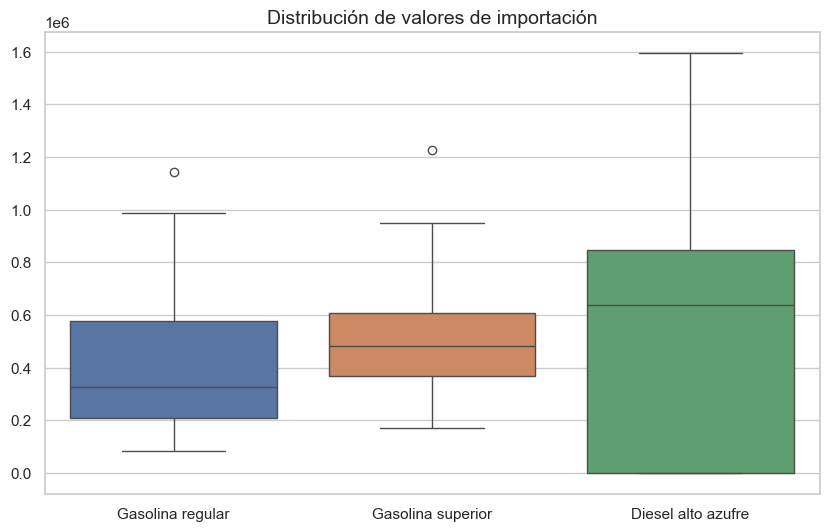

In [662]:
# Histograma de importaci√≥n
df_importacion[['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']].hist(figsize=(10, 6))
plt.suptitle("Distribuci√≥n de importaciones")
plt.show()

# Boxplot para ver outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_importacion.select_dtypes(include='number'))
plt.title("Distribuci√≥n de valores de importaci√≥n")
plt.show()

Los histogramas de "Gasolina regular", "Gasolina superior" y "Diesel alto azufre" muestran la distribuci√≥n de la frecuencia de los valores de importaci√≥n para cada tipo de combustible. Para la "Gasolina regular" y la "Gasolina superior", las distribuciones parecen estar sesgadas a la derecha, indicando que la mayor√≠a de las importaciones son de menores vol√∫menes, con algunas importaciones de mayor volumen que se extienden hacia la derecha. El "Diesel alto azufre" tambi√©n muestra un sesgo a la derecha, pero con un pico m√°s pronunciado en los vol√∫menes m√°s bajos, sugiriendo que las importaciones de di√©sel tienden a concentrarse a√∫n m√°s en cantidades peque√±as. Las escalas en el eje x, representadas en 106, indican que los vol√∫menes de importaci√≥n son significativos.

El diagrama de cajas ("Distribuci√≥n de valores de importaci√≥n") ofrece una visi√≥n comparativa de la centralidad, dispersi√≥n y presencia de valores at√≠picos para los tres tipos de combustible. La "Gasolina regular" y la "Gasolina superior" tienen medianas y rangos intercuart√≠licos relativamente similares, aunque la "Gasolina superior" muestra una ligera tendencia a valores de importaci√≥n un poco m√°s altos en su mediana y tercer cuartil. En contraste, el "Diesel alto azufre" presenta una mediana y un rango intercuart√≠lico considerablemente m√°s elevados en comparaci√≥n con las gasolinas, lo que sugiere que las importaciones de di√©sel tienden a ser en vol√∫menes mayores y con una mayor variabilidad en los cuartiles superiores. Los puntos individuales por encima de los bigotes en los diagramas de caja para "Gasolina regular" y "Gasolina superior" indican la presencia de valores at√≠picos (outliers), representando importaciones excepcionalmente grandes para esos combustibles. El "Diesel alto azufre", aunque con valores m√°s altos, no muestra valores at√≠picos expl√≠citos por encima del bigote superior dentro del rango visible, lo que podr√≠a indicar que sus valores m√°ximos, aunque altos, est√°n dentro de la distribuci√≥n esperada para vol√∫menes grandes.

Ya que contamos con una analisis univariado seria bueno ahora analizar las variables de forma comparativa entre ambos datasets y analizar su comportamiento.

                            Gasolina regular_import  Gasolina superior_import  \
Gasolina regular_import                    1.000000                  0.788243   
Gasolina superior_import                   0.788243                  1.000000   
Diesel alto azufre_import                 -0.594085                 -0.325889   
Gasolina regular_consumo                   0.939163                  0.709164   
Gasolina superior_consumo                  0.876826                  0.756465   
Diesel alto azufre_consumo                -0.726859                 -0.496108   

                            Diesel alto azufre_import  \
Gasolina regular_import                     -0.594085   
Gasolina superior_import                    -0.325889   
Diesel alto azufre_import                    1.000000   
Gasolina regular_consumo                    -0.653296   
Gasolina superior_consumo                   -0.521266   
Diesel alto azufre_consumo                   0.792668   

                            Gaso

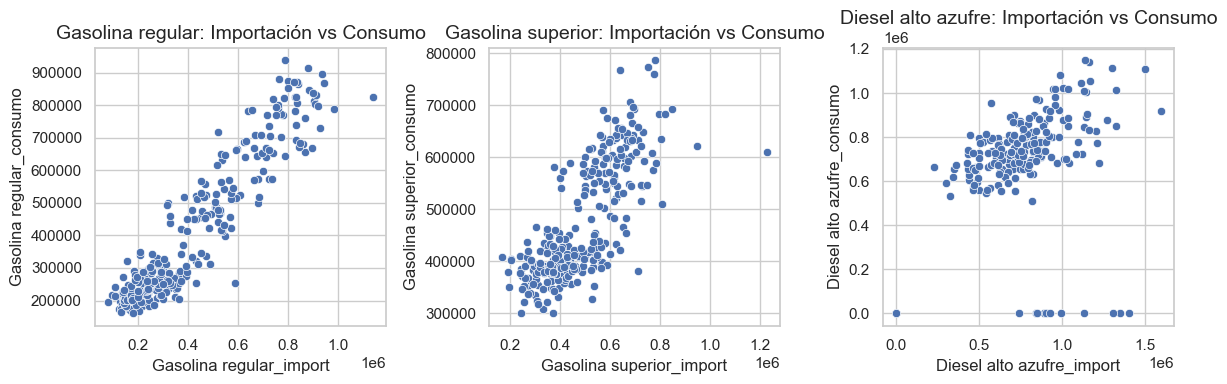

In [663]:
df_merged = pd.merge(df_importacion, df_consumo, on='Fecha', suffixes=('_import', '_consumo'))

# Correlaci√≥n entre importaci√≥n y consumo por tipo de combustible
print(df_merged.corr())

# Gr√°fico de dispersi√≥n
plt.figure(figsize=(12, 4))
for i, tipo in enumerate(['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=df_merged, x=f'{tipo}_import', y=f'{tipo}_consumo')
    plt.title(f'{tipo}: Importaci√≥n vs Consumo')
plt.tight_layout()
plt.show()


Los valores num√©ricos presentados corresponden a matrices de correlaci√≥n (probablemente de Pearson) entre las variables, incluyendo "Fecha" (aunque su correlaci√≥n con otras variables temporales o de volumen no es directamente interpretable sin m√°s contexto), "Gasolina regular import", "Gasolina superior import", "Diesel alto azufre import", "Gasolina regular consumo", "Gasolina superior consumo" y "Diesel alto azufre consumo". Destaca una fuerte correlaci√≥n positiva entre las importaciones y los consumos correspondientes de cada tipo de combustible. Por ejemplo, "Gasolina regular import" tiene una correlaci√≥n de 0.891135 con "Gasolina regular consumo", "Gasolina superior import" con "Gasolina superior consumo" es 0.933475, y "Diesel alto azufre import" con "Diesel alto azufre consumo" es 0.752068. Estas altas correlaciones sugieren que los vol√∫menes importados est√°n fuertemente relacionados con los vol√∫menes consumidos para cada tipo de combustible. Tambi√©n se observan correlaciones positivas entre las importaciones y consumos de diferentes tipos de combustibles, aunque generalmente m√°s d√©biles que las correlaciones entre importaci√≥n y consumo del mismo tipo. Por ejemplo, "Gasolina regular import" tiene una correlaci√≥n de 0.702268 con "Gasolina superior import" y 0.760243 con "Gasolina superior consumo".

Los diagramas de dispersi√≥n visualizan estas relaciones de correlaci√≥n:

    "Gasolina regular: Importaci√≥n vs Consumo": Muestra una clara tendencia lineal positiva. A medida que aumenta el volumen de importaci√≥n de gasolina regular, tambi√©n lo hace el volumen de consumo de gasolina regular. Los puntos de datos se agrupan alrededor de una l√≠nea ascendente, lo que confirma la fuerte correlaci√≥n positiva observada en la matriz de correlaci√≥n (0.891135). Hay cierta dispersi√≥n alrededor de la l√≠nea, pero la relaci√≥n es evidente.

    "Gasolina superior: Importaci√≥n vs Consumo": Similar al gr√°fico de gasolina regular, este diagrama tambi√©n exhibe una fuerte relaci√≥n lineal positiva. La concentraci√≥n de puntos alrededor de una l√≠nea ascendente es notable, reflejando la alta correlaci√≥n de 0.933475. Esto sugiere que las importaciones de gasolina superior son un buen predictor de su consumo. La dispersi√≥n parece ser ligeramente menor que en el caso de la gasolina regular, indicando una relaci√≥n quiz√°s un poco m√°s estrecha.

    "Diesel alto azufre: Importaci√≥n vs Consumo": Aunque tambi√©n muestra una relaci√≥n lineal positiva, la dispersi√≥n de los puntos es visiblemente mayor en comparaci√≥n con los gr√°ficos de gasolina. Esto es consistente con el coeficiente de correlaci√≥n ligeramente m√°s bajo (0.752068) en comparaci√≥n con las gasolinas. Si bien hay una tendencia de que a mayores importaciones corresponden mayores consumos, hay m√°s variabilidad en la relaci√≥n. Esto podr√≠a implicar que otros factores, adem√°s de la importaci√≥n directa, influyen en el consumo de di√©sel alto azufre, o que hay m√°s fluctuaciones en la relaci√≥n importaci√≥n-consumo para este combustible.

Para finalizar el analisis exploratorio vale la pena ver como es que se comportan las variables a lo largo del tiempo para ambos datasets solo comparando la misma variable de ambos datasets a lo largo del tiempo. 

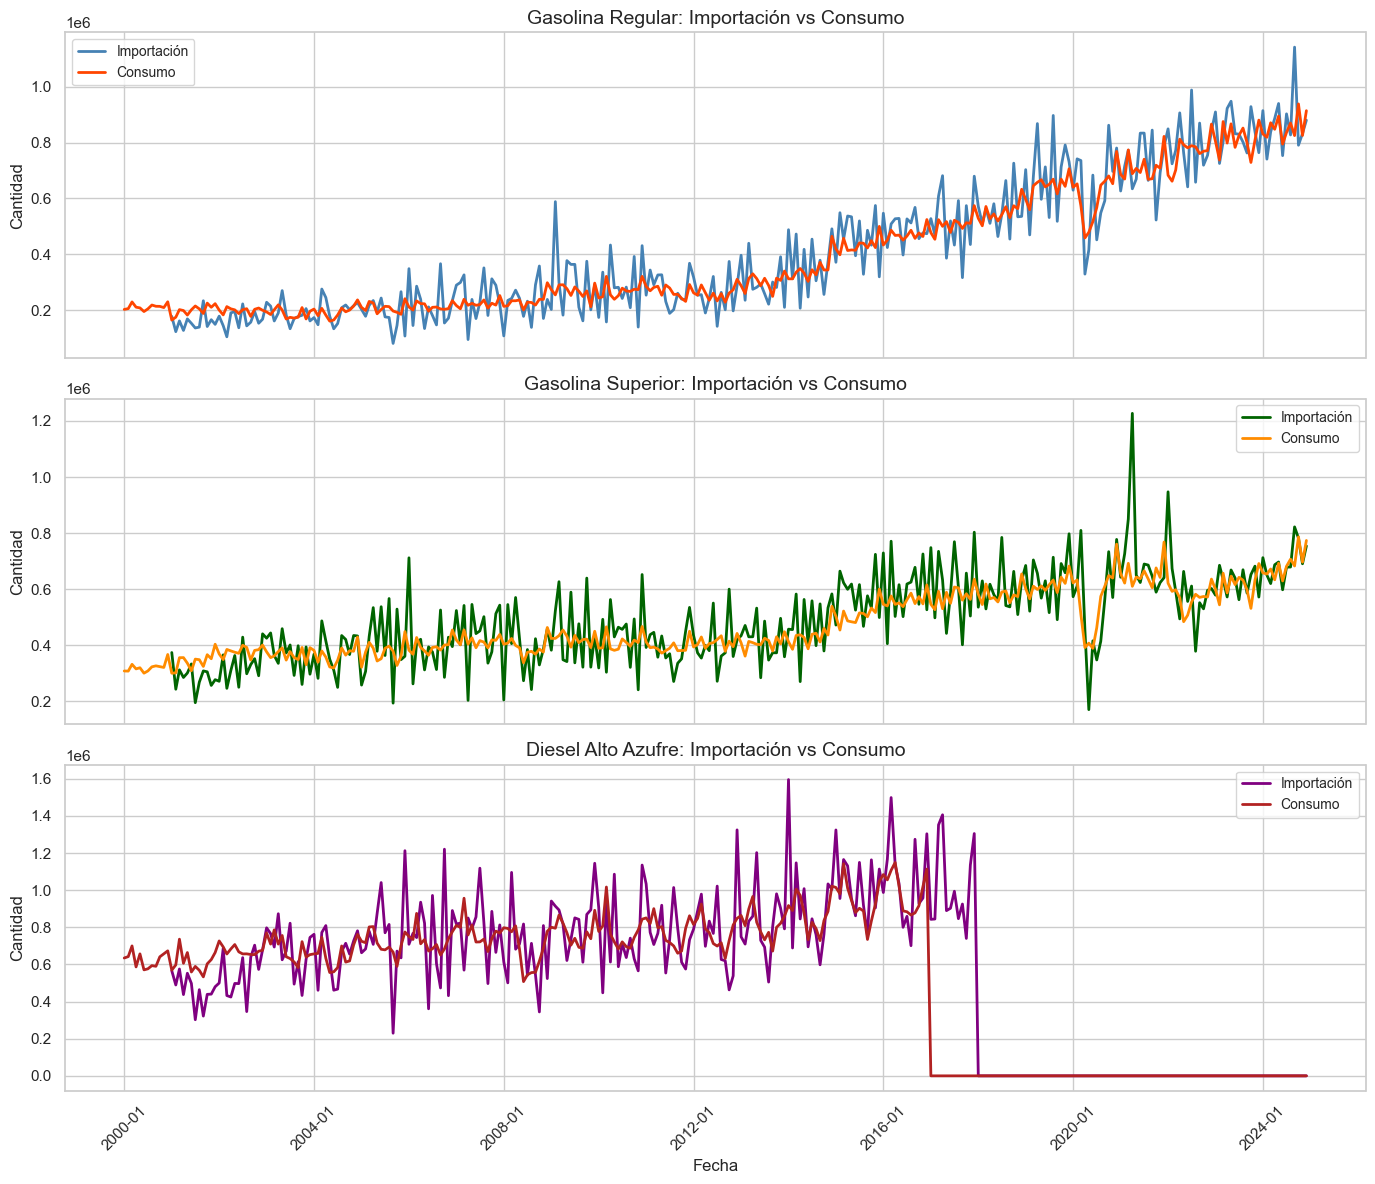

In [664]:

sns.set(style="whitegrid")
plt.rcParams.update({'axes.titlesize': 14, 'axes.labelsize': 12, 'legend.fontsize': 10})

# Crear subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Formato de fecha para eje x
date_format = mdates.DateFormatter('%Y-%m')

# -------- Gasolina regular --------
axes[0].plot(df_importacion.index, df_importacion['Gasolina regular'], label='Importaci√≥n', color='steelblue', linewidth=2)
axes[0].plot(df_consumo.index, df_consumo['Gasolina regular'], label='Consumo', color='orangered', linewidth=2)
axes[0].set_title('Gasolina Regular: Importaci√≥n vs Consumo')
axes[0].set_ylabel('Cantidad')
axes[0].legend()
axes[0].xaxis.set_major_formatter(date_format)

# -------- Gasolina superior --------
axes[1].plot(df_importacion.index, df_importacion['Gasolina superior'], label='Importaci√≥n', color='darkgreen', linewidth=2)
axes[1].plot(df_consumo.index, df_consumo['Gasolina superior'], label='Consumo', color='darkorange', linewidth=2)
axes[1].set_title('Gasolina Superior: Importaci√≥n vs Consumo')
axes[1].set_ylabel('Cantidad')
axes[1].legend()
axes[1].xaxis.set_major_formatter(date_format)

# -------- Diesel --------
axes[2].plot(df_importacion.index, df_importacion['Diesel alto azufre'], label='Importaci√≥n', color='purple', linewidth=2)
axes[2].plot(df_consumo.index, df_consumo['Diesel alto azufre'], label='Consumo', color='firebrick', linewidth=2)
axes[2].set_title('Diesel Alto Azufre: Importaci√≥n vs Consumo')
axes[2].set_xlabel('Fecha')
axes[2].set_ylabel('Cantidad')
axes[2].legend()
axes[2].xaxis.set_major_formatter(date_format)

# Ajustes finales
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El gr√°fico de "Gasolina Regular: Importaci√≥n vs Consumo" muestra una clara tendencia al alza tanto en la importaci√≥n (l√≠nea azul) como en el consumo (l√≠nea naranja) de gasolina regular a lo largo del tiempo, desde el a√±o 2000 hasta principios de 2024. Ambas series de tiempo siguen un patr√≥n similar, con picos y valles que suelen coincidir, lo que sugiere una estrecha relaci√≥n entre la cantidad de gasolina regular que se importa y la que se consume. La l√≠nea de importaci√≥n tiende a ser un poco m√°s vol√°til, presentando fluctuaciones m√°s marcadas que el consumo, el cual parece ser una versi√≥n m√°s suavizada de la importaci√≥n. Esto podr√≠a indicar que las importaciones se ajustan proactivamente a la demanda anticipada, o que el consumo es m√°s estable debido a la acumulaci√≥n de inventarios o a la regularizaci√≥n de la demanda por otros medios. Se observa un crecimiento sostenido en la demanda y oferta de gasolina regular a lo largo de las dos d√©cadas representadas.

En el gr√°fico de "Gasolina Superior: Importaci√≥n vs Consumo", tambi√©n se observa una tendencia general de crecimiento tanto en la importaci√≥n (l√≠nea verde) como en el consumo (l√≠nea naranja) de gasolina superior desde el a√±o 2000 hasta el 2024. Al igual que con la gasolina regular, existe una fuerte correlaci√≥n visual entre las dos series, donde el consumo sigue de cerca las tendencias de la importaci√≥n. Sin embargo, la volatilidad en la importaci√≥n de gasolina superior parece ser m√°s pronunciada en ciertos per√≠odos, con picos y ca√≠das m√°s abruptos que en el caso de la gasolina regular. Esto podr√≠a deberse a factores de mercado m√°s espec√≠ficos, cambios en las pol√≠ticas de importaci√≥n o fluctuaciones en la demanda estacional de gasolina superior. A pesar de estas fluctuaciones, la tendencia subyacente de crecimiento en el consumo se mantiene, lo que indica una demanda creciente de este tipo de combustible.

El gr√°fico de "Diesel Alto Azufre: Importaci√≥n vs Consumo" presenta un comportamiento m√°s err√°tico y notablemente diferente hacia el final del per√≠odo. Desde el a√±o 2000 hasta aproximadamente 2016, la importaci√≥n (l√≠nea morada) y el consumo (l√≠nea roja) de di√©sel alto azufre muestran una correlaci√≥n, aunque con mayor volatilidad en la importaci√≥n. Hay periodos donde la importaci√≥n es significativamente mayor que el consumo, y viceversa. Sin embargo, a partir de finales de 2016, la l√≠nea de consumo de di√©sel alto azufre cae abruptamente a cero y se mantiene en ese nivel, mientras que la importaci√≥n contin√∫a con fluctuaciones. Esta ca√≠da repentina del consumo a cero, mientras la importaci√≥n sigue activa, es un punto cr√≠tico que sugiere un cambio fundamental en los datos o en la din√°mica del mercado. Podr√≠a indicar una interrupci√≥n en la recopilaci√≥n de datos de consumo, un cambio normativo que proh√≠be o restringe severamente el consumo de di√©sel alto azufre (por ejemplo, por regulaciones ambientales que favorecen el di√©sel de bajo azufre), o un cambio en la clasificaci√≥n o reporte del combustible. Este punto requiere una investigaci√≥n m√°s profunda para entender la discrepancia.

## Series para las diferentes gasolinas

In [665]:
def resumen_serie(df, nombre):
    inicio = df.index.min()
    fin = df.index.max()
    frecuencia = pd.infer_freq(df.index)

    print(f"\n[{nombre}]")
    print(f"Inicio: {inicio}")
    print(f"Fin: {fin}")
    print(f"Frecuencia: {frecuencia}")

resumen_serie(df_importacion, "Importaci√≥n")
resumen_serie(df_consumo, "Consumo")


[Importaci√≥n]
Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia: MS

[Consumo]
Inicio: 2000-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia: MS


Podemos ver que para el dataframe de IMportaci√≥n su inicio es en eneror de 2001, mientras que si fin es en diciembre de 2024. Para el dataframe de consumo su inicio es en enero de 2000 y su fin es en diciembre de 2024. Tenemos que para ambos dataframes su frecuencia es mensual, osea que los datos se presenta de forma mensual para cada una de las series univariadas que se analizaran m√°s adelante.

Ahora con el inicio, fin y frecuencia definido vamos a analizar cada una de las series univariadas que se tiene por cada datset.

### Importaci√≥n

#### Gasolina regular

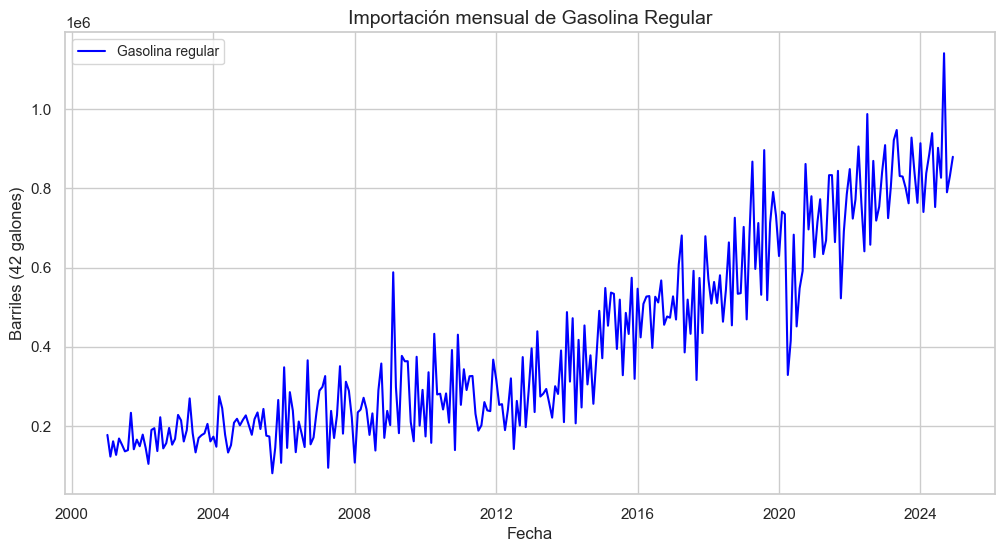

In [666]:
plt.figure(figsize=(12,6))
plt.plot(df_importacion.index, df_importacion['Gasolina regular'], color='blue', label='Gasolina regular')
plt.title("Importaci√≥n mensual de Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()


- Claramente se observa una tendencia creciente a lo largo de los a√±os.

- Desde niveles iniciales cercanos a ~150,000‚Äì200,000 barriles mensuales en 2001 hasta valores superiores al mill√≥n de barriles en 2024.

- Esto indica que la media de la serie no es constante: no es estacionaria en media.

- Esta tendencia probablemente est√° asociada al crecimiento vehicular a lo largo de los a√±os

Evoluci√≥n por a√±o
- La serie muestra aumentos paulatinos, sin ca√≠das prolongadas que rompan la tendencia general.
- Los que si se perciben son algunos picos muy notables y ca√≠das en torno a 2008 (crisis financiera global) y entre 2020‚Äì2021 (pandemia).

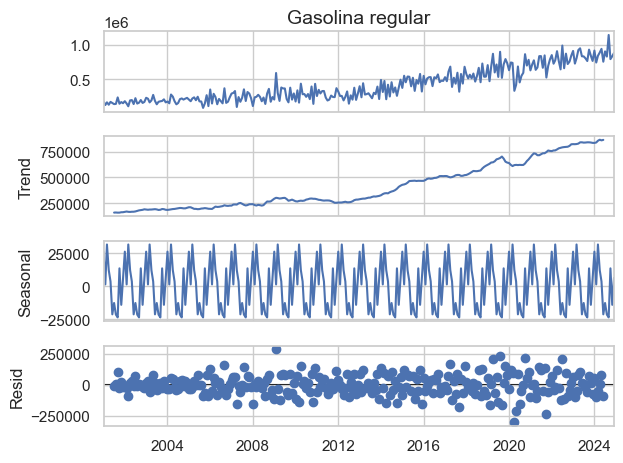

In [667]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_importacion['Gasolina regular'], model='additive', period=12)
result.plot()
plt.show()

#### Gasolina superior

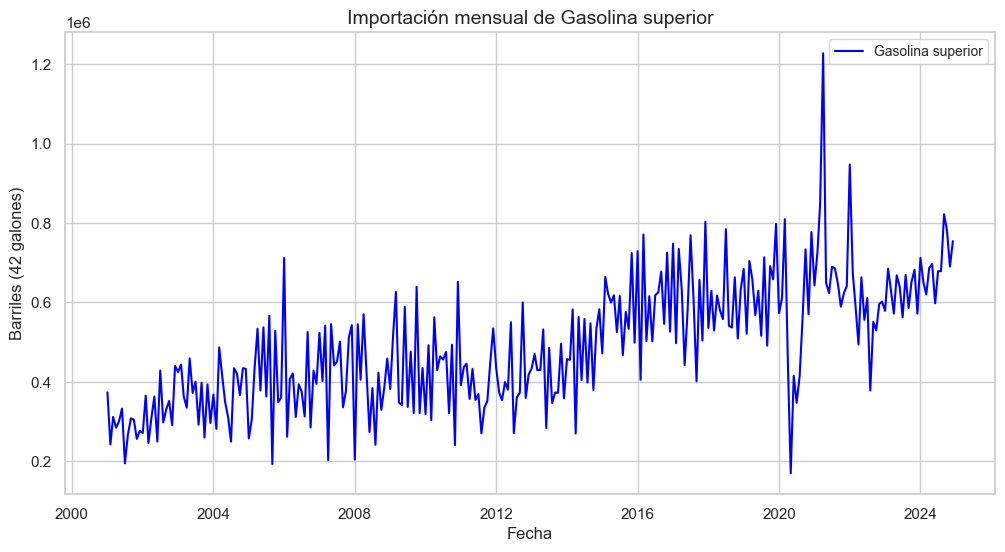

In [668]:
plt.figure(figsize=(12,6))
plt.plot(df_importacion.index, df_importacion['Gasolina superior'], color='blue', label='Gasolina superior')
plt.title("Importaci√≥n mensual de Gasolina superior")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()

- La tendencia a lo largo del tiempo no es tan clara como en gasolina regular.

- Desde 2001 hasta ~2018 hay una ligera tendencia creciente, aunque con bastante variabilidad mensual.

- Despu√©s de 2018 la tendencia parece m√°s plana, incluso con ca√≠das abruptas en ciertos momentos.

- Esto sugiere que la media no es constante, pero tampoco muestra un crecimiento sostenido tan fuerte como la regular.

Evolucion por a√±o
- Hasta 2019 hay una relativa estabilidad con variaciones normales.

- En 2020‚Äì2021 se observa un pico muy abrupto seguido por una ca√≠da dr√°stica y una recuperaci√≥n parcial posterior.

- Despu√©s de 2021 las importaciones no vuelven a los m√°ximos previos, lo cual sugiere un cambio estructural en el consumo o las pol√≠ticas de importaci√≥n de gasolina superior.

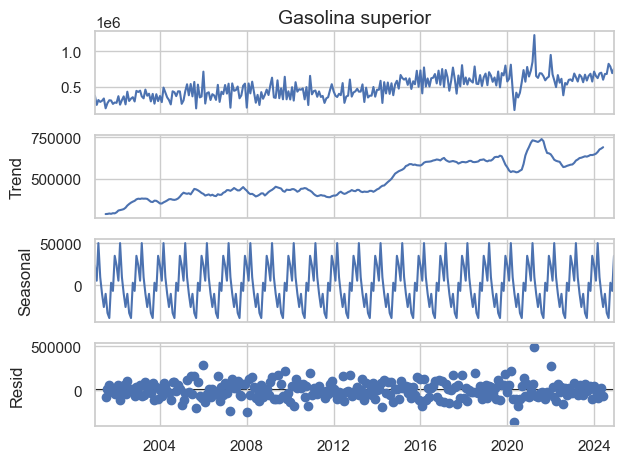

In [669]:
result = seasonal_decompose(df_importacion['Gasolina superior'], model='additive', period=12)
result.plot()
plt.show()


#### Diesel alto azufre

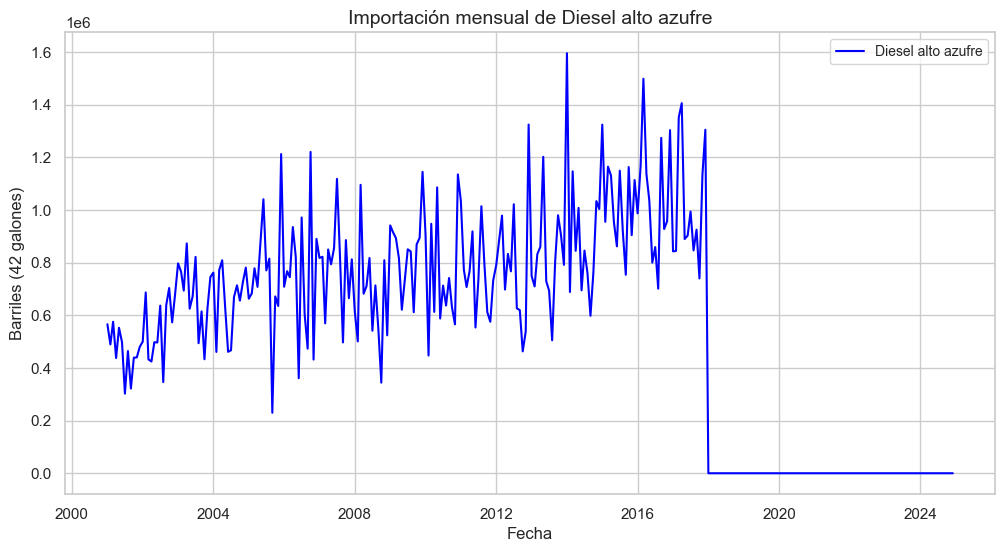

In [670]:
plt.figure(figsize=(12,6))
plt.plot(df_importacion.index, df_importacion['Diesel alto azufre'], color='blue', label='Diesel alto azufre')
plt.title("Importaci√≥n mensual de Diesel alto azufre")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()

- La serie muestra una clara tendencia creciente desde 2001 hasta aproximadamente 2008‚Äì2010, alcanzando niveles por encima de 1.2‚Äì1.5 millones de barriles.

- Despu√©s de 2010, la serie muestra fluctuaciones altas pero no un crecimiento sostenido.

- A partir de 2018‚Äì2019 la serie cae abruptamente a cero y permanece ah√≠ hasta 2024.

Evolucion por a√±o 

- La serie es bastante vol√°til entre 2004 y 2015, con varios picos y ca√≠das abruptas.

- Desde 2018 en adelante la importaci√≥n cae a cero y no se recupera en absoluto, investigando un poco de por que es esto es que dice que este cambio se implement√≥ para cumplir con est√°ndares ambientales y proteger los motores modernos. 


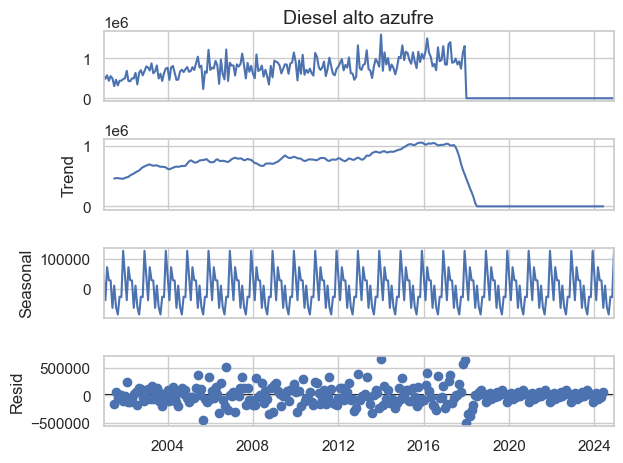

In [671]:
result = seasonal_decompose(df_importacion['Diesel alto azufre'], model='additive', period=12)
result.plot()
plt.show()

### Consumo mensual

#### Gasolina regular

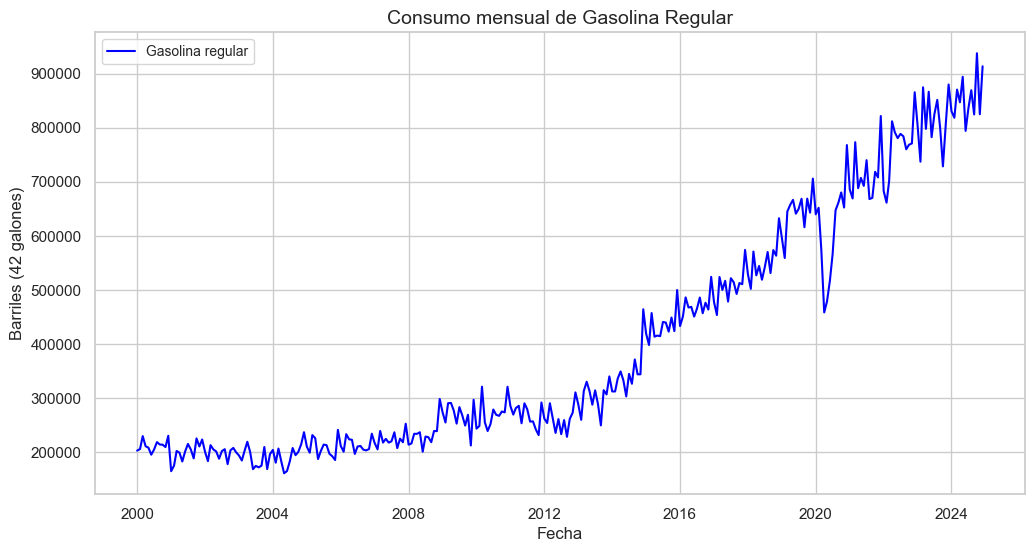

In [672]:
plt.figure(figsize=(12,6))
plt.plot(df_consumo.index, df_consumo['Gasolina regular'], color='blue', label='Gasolina regular')
plt.title("Consumo mensual de Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()


- La serie muestra una tendencia creciente clara y sostenida a lo largo de los a√±os.

- Desde niveles de ~200,000 barriles en 2001 hasta m√°s de 900,000 barriles hacia 2024.

- Esta tendencia implica que la media no es constante: no estacionaria en media.

- El patr√≥n ascendente coincide con el crecimiento de poblacion por ende de vehiculos tambien. 

Evolucion por a√±o 
- Hasta ~2015 la serie crece lentamente.

- Despu√©s de 2015 el crecimiento se acelera notablemente.

- En 2020‚Äì2021 (a√±os de pandemia) hay una ca√≠da abrupta en medio de la tendencia creciente, seguida de recuperaci√≥n r√°pida y continuidad de la tendencia ascendente.


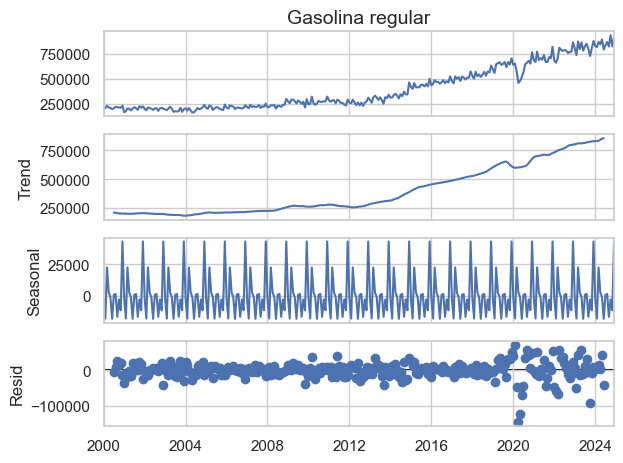

In [673]:
result = seasonal_decompose(df_consumo['Gasolina regular'], model='additive', period=12)
result.plot()
plt.show()

#### Gasolina superior

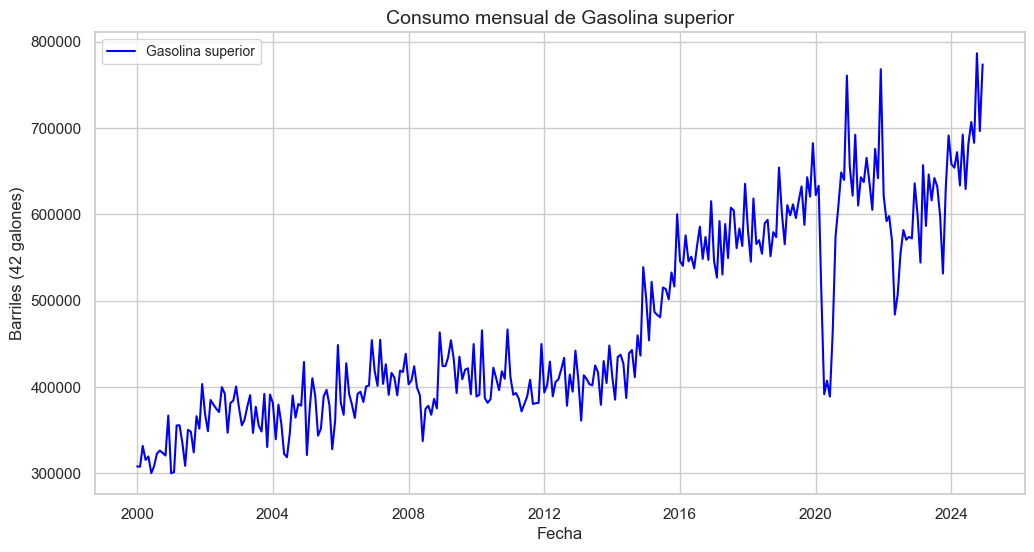

In [674]:
plt.figure(figsize=(12,6))
plt.plot(df_consumo.index, df_consumo['Gasolina superior'], color='blue', label='Gasolina superior')
plt.title("Consumo mensual de Gasolina superior")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()

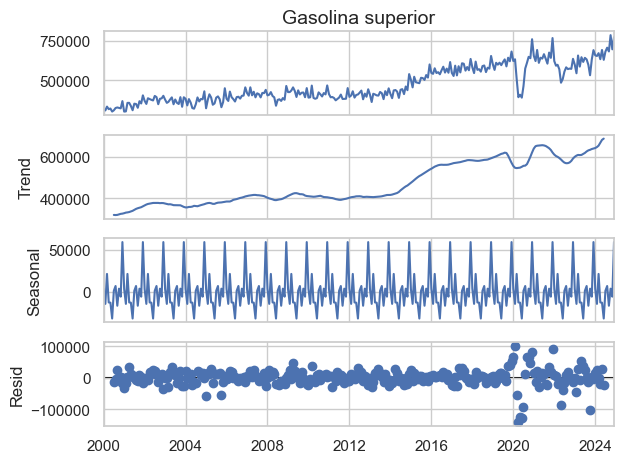

In [675]:
result = seasonal_decompose(df_consumo['Gasolina superior'], model='additive', period=12)
result.plot()
plt.show()

- La serie muestra una tendencia creciente a largo plazo, pero m√°s irregular que la de gasolina regular.

- Desde ~250,000 barriles en 2001 hasta ~750,000‚Äì800,000 barriles en 2024.

- Crecimiento sostenido aunque m√°s interrumpido por fluctuaciones bruscas.

Evolucion por a√±o 

- Entre 2001‚Äì2014 el consumo se mantiene relativamente estable con ligeras subidas.

- A partir de 2015 hay un incremento notable.

- En 2020‚Äì2021 (aca es mas notable los a√±os de pandemia) aparecen fuertes ca√≠das y picos, pero la serie retoma su tendencia ascendente en los √∫ltimos a√±os.

#### Diesel alto azufre

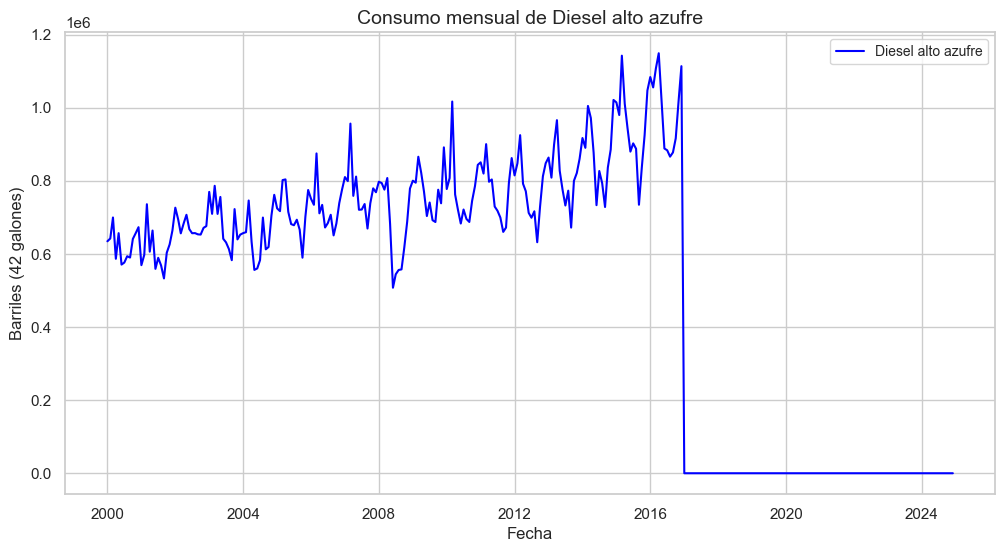

In [676]:
plt.figure(figsize=(12,6))
plt.plot(df_consumo.index, df_consumo['Diesel alto azufre'], color='blue', label='Diesel alto azufre')
plt.title("Consumo mensual de Diesel alto azufre")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()

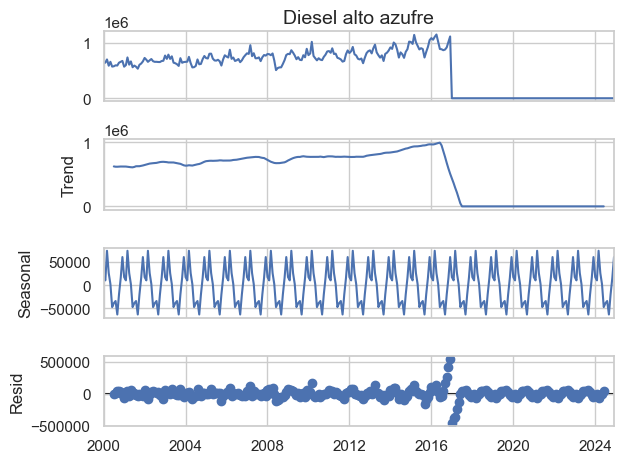

In [677]:
result = seasonal_decompose(df_consumo['Diesel alto azufre'], model='additive', period=12)
result.plot()
plt.show()

- Desde 2001 hasta aproximadamente 2015, la serie muestra un leve crecimiento y cierta estabilidad en torno a 700,000‚Äì900,000 barriles.

- Despu√©s de 2016, la serie cae abruptamente a cero y permanece en cero hasta 2024.

- La falta de consumo se debe a que ya no se importa ni se comercializa en guatemala. 

Evolucion por a√±o
- La serie es relativamente estable en los primeros a√±os, con peque√±as fluctuaciones alrededor de una media alta.

- Despu√©s de 2015, el consumo desaparece totalmente y no se recupera.

- La pandemia no tiene efecto aparente en esta serie porque para entonces ya no se comercializaba.

### Componetes de las series

A continuaci√≥n se presenta los componentes de cada una de las series presentadas anteriormente:

| Serie                                | Tendencia                        | Estacionalidad                | Pandemia (2020‚Äì21)          | Varianza         | Observaciones clave          |
| ------------------------------------ | -------------------------------- | ----------------------------- | --------------------------- | ---------------- | ---------------------------- |
| **Importaci√≥n - Gasolina regular**   | Creciente                        | Posible anual                 | Leve ca√≠da + recuperaci√≥n   | Creciente        | Serie muy clara para modelar |
| **Importaci√≥n - Gasolina superior**  | Creciente irregular              | Posible anual                 | Pico abrupto + ca√≠da fuerte | Alta             | M√°s vol√°til que regular      |
| **Importaci√≥n - Diesel alto azufre** | Creciente hasta 2015, luego cero | Posible anual en tramo activo | Sin efecto (ya en cero)     | Alta, luego nula | Cambio estructural tras 2015 |
| **Consumo - Gasolina regular**       | Creciente                        | Posible anual                 | Ca√≠da + recuperaci√≥n        | Creciente        | Patr√≥n similar a importaci√≥n |
| **Consumo - Gasolina superior**      | Creciente irregular              | Posible anual                 | Ca√≠da fuerte + recuperaci√≥n | Alta             | Muy vol√°til                  |
| **Consumo - Diesel alto azufre**     | Creciente hasta 2015, luego cero | Posible anual en tramo activo | Sin efecto                  | Alta, luego nula | Cambio estructural tras 2015 |

Ninguna de las series analizadas parece estrictamente estacionaria porque presentan tendencias crecientes o irregulares, lo que indica que la media cambia con el tiempo. Adem√°s, muchas muestran varianza creciente o alta volatilidad, lo que viola la condici√≥n de varianza constante. Eventos externos como la pandemia provocaron ca√≠das y recuperaciones abruptas, afectando temporalmente la estructura estad√≠stica de las series. En el caso del di√©sel, hay un cambio estructural despu√©s de 2015, donde la serie se aplana a cero, lo que la hace estacionaria por definici√≥n, pero sin variabilidad √∫til. Estos factores combinados impiden que las series cumplan con los requisitos de estacionariedad en media y varianza.

Se debe de realizar transformaciones en las series para que sean estacionarias antes de aplicar an√°lisis como pron√≥sticos, modelados o detecci√≥n de ciclos. Las √∫nicas excepciones son los tramos despu√©s de 2015 en donde los valores son cero constantes (en diesel), que t√©cnicamente no requieren transformaci√≥n pero tampoco aportan variabilidad √∫til.


## Aca vamos a diferenciar los datos

A diferencia de antes aca no importa que los valores esten en escala logaritmica para diferenciar asi que.. 



### Importaci√≥n Gasolina Regular

In [678]:
### Gasolina Regular
serieGR = df_importacion['Gasolina regular']

print('Resultados del Test de Dickey Fuller')
dfTest = adfuller(serieGR, autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estad√≠stico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
    salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller
Estad√≠stico de prueba          0.830167
p-value                        0.992108
# de retardos usados           9.000000
# de observaciones usadas    278.000000
Critical Value (1%)           -3.454094
Critical Value (5%)           -2.871993
Critical Value (10%)          -2.572340
dtype: float64


Como no se rechaza ho nula

In [679]:
# Aplicamos una diferenciaci√≥n simple
ts_gasGR_diff = serieGR.diff()
ts_gasGR_diff.fillna(0, inplace=True)

print('Resultados del Test de Dickey Fuller para una diferenciaci√≥n de la serie')
dfTest = adfuller(ts_gasGR_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estad√≠stico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
    salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller para una diferenciaci√≥n de la serie
Estad√≠stico de prueba       -1.023316e+01
p-value                      4.967668e-18
# de retardos usados         8.000000e+00
# de observaciones usadas    2.790000e+02
Critical Value (1%)         -3.454008e+00
Critical Value (5%)         -2.871956e+00
Critical Value (10%)        -2.572320e+00
dtype: float64


Ahora si..... Ya se rechaza asi que

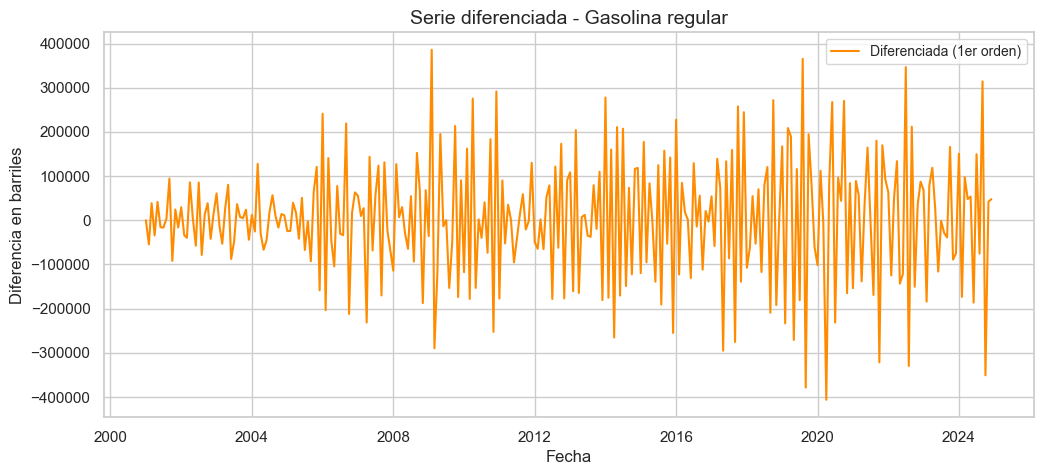

In [680]:
plt.figure(figsize=(12,5))
plt.plot(ts_gasGR_diff, label='Diferenciada (1er orden)', color='darkorange')
plt.title('Serie diferenciada - Gasolina regular')
plt.xlabel('Fecha')
plt.ylabel('Diferencia en barriles')
plt.grid(True)
plt.legend()
plt.show()

Las redes neuronales (como LSTM) son sensibles a la escala de los datos. Si hay valores grandes, junto con peque√±os, la red puede tener dificultades al aprender, especialmente usando funciones de activaci√≥n como tanh o sigmoid. (Adem√°s que esto facilita el entrenamiento). 

Como las redes neuronales trabajan mejor con los datos normalizados, vamos a normalizar la serie. 

Al normalizarla, estamos haciendo que la data tenga una media de 0 y una desviaci√≥n est√°ndar de 1. 

In [681]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ts_gasGR_scaled = scaler.fit_transform(ts_gasGR_diff.values.reshape(-1,1))
ts_gasGR_scaled[:7]

array([[-0.01786488],
       [-0.41838396],
       [ 0.26504895],
       [-0.26983695],
       [ 0.28542658],
       [-0.13386558],
       [-0.13949932]])

### Importaci√≥n Gasolina Superior

In [682]:
### Gasolina Regular
serieGS = df_importacion['Gasolina superior']

print('Resultados del Test de Dickey Fuller')
dfTest = adfuller(serieGS, autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estad√≠stico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
    salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller
Estad√≠stico de prueba         -1.601987
p-value                        0.482595
# de retardos usados           9.000000
# de observaciones usadas    278.000000
Critical Value (1%)           -3.454094
Critical Value (5%)           -2.871993
Critical Value (10%)          -2.572340
dtype: float64


Como no se rechaza ho nula

In [683]:
# Aplicamos una diferenciaci√≥n simple
ts_gasGS_diff = serieGS.diff()
ts_gasGS_diff.fillna(0, inplace=True)

print('Resultados del Test de Dickey Fuller para una diferenciaci√≥n de la serie')
dfTest = adfuller(ts_gasGS_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estad√≠stico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
    salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller para una diferenciaci√≥n de la serie
Estad√≠stico de prueba       -7.800177e+00
p-value                      7.529848e-12
# de retardos usados         1.100000e+01
# de observaciones usadas    2.760000e+02
Critical Value (1%)         -3.454267e+00
Critical Value (5%)         -2.872070e+00
Critical Value (10%)        -2.572381e+00
dtype: float64


Ahora si..... Ya se rechaza asi que

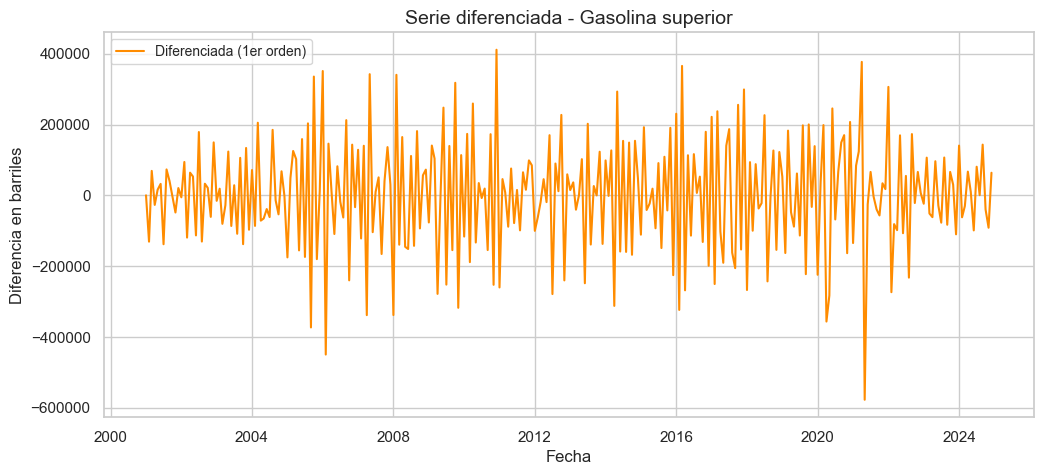

In [684]:
plt.figure(figsize=(12,5))
plt.plot(ts_gasGS_diff, label='Diferenciada (1er orden)', color='darkorange')
plt.title('Serie diferenciada - Gasolina superior')
plt.xlabel('Fecha')
plt.ylabel('Diferencia en barriles')
plt.grid(True)
plt.legend()
plt.show()

In [685]:
scaler = StandardScaler()
ts_gasGS_scaled = scaler.fit_transform(ts_gasGS_diff.values.reshape(-1,1))
ts_gasGS_scaled[:7]

array([[-0.00839873],
       [-0.84051577],
       [ 0.43027508],
       [-0.18025785],
       [ 0.09243469],
       [ 0.19699376],
       [-0.88675546]])

### Importaci√≥n de Diesel Alto Azufre

### Consumo Gasolina regular

### Consumo Gasolina Superior

### Consumo de Diesel Alto Azufre

Vamos a separar la serie en entrenamiento, validaci√≥n y prueba. En este caso, tendremos 60% para entrenamiento y 20% para validaci√≥n y prueba respectivamente.

Para que pueda usarse el argoritmo LSTM es necesario transformar la serie en una supervisada, de manera que las observaciones anteriores sean capaces de estimar la siguiente. En este caso vamos a usar el mes anterior para predecir el siguiente por lo que vamos a transformar el arreglo de numpy en una matriz de dos dimensiones en la que la dimensi√≥n 1 sea el instante t-1 y la dimensi√≥n 2 sea el instante t.

#
```
DATA: [100, 120, 130, 150]
OUTPUT:
X = [[100], [120], [130]] (valores pasados, features)
y = [120, 130, 150] (valor actual, target)
```

##
Las series de tiempo por s√≠ solas no vienen en un formato t√≠pico de aprendizaje supervisado (como una tabla de features y una variable objetivo).

Entonces lo que se hace es crear pares entrada‚Äìsalida, como:

"Dado el valor en el mes anterior, ¬øpuedes predecir el valor del mes actual?"



In [686]:
# Obtenemos el tama√±o total
total_len = len(ts_gasGS_scaled)

# Definimos las proporciones
train_prop = 0.6
val_prop = 0.2
test_prop = 0.2

# Calculamos los √≠ndices de corte
train_end = int(train_prop * total_len)
val_end = train_end + int(val_prop * total_len)

# Hacemos la separaci√≥n
train = ts_gasGS_scaled[:train_end]
validation = ts_gasGS_scaled[train_end:val_end]
test = ts_gasGS_scaled[val_end:]

# Verificamos dimensiones
print(f"Total registros: {total_len}")
print(f"Train: {len(train)} | Validation: {len(validation)} | Test: {len(test)}")


Total registros: 288
Train: 172 | Validation: 57 | Test: 59


Redimensionar para LSTM univariado

In [687]:
# Las redes LSTM esperan entrada con forma (n_samples, time_steps, n_features)
train = train.reshape(-1, 1)
validation = validation.reshape(-1, 1)
test = test.reshape(-1, 1)

# Confirmar que est√° en el formato adecuado
train.shape, validation.shape, test.shape


((172, 1), (57, 1), (59, 1))

Convertir la serie en un problema supervisado

In [688]:
def supervisada(serie, retrasos=1):
    serie_x = []
    serie_y = []
    for i in range(len(serie) - retrasos):
        valor = serie[i:(i + retrasos), 0]
        valor_sig = serie[i + retrasos, 0]
        serie_x.append(valor)
        serie_y.append(valor_sig)
    return np.array(serie_x), np.array(serie_y)

# Aplicamos a cada subconjunto
x_train, y_train = supervisada(train, retrasos=3)
x_val, y_val = supervisada(validation, retrasos=3)
x_test, y_test = supervisada(test, retrasos=3)

In [689]:
x_train


array([[-0.00839873, -0.84051577,  0.43027508],
       [-0.84051577,  0.43027508, -0.18025785],
       [ 0.43027508, -0.18025785,  0.09243469],
       [-0.18025785,  0.09243469,  0.19699376],
       [ 0.09243469,  0.19699376, -0.88675546],
       [ 0.19699376, -0.88675546,  0.456268  ],
       [-0.88675546,  0.456268  ,  0.24774682],
       [ 0.456268  ,  0.24774682, -0.02961474],
       [ 0.24774682, -0.02961474, -0.31654349],
       [-0.02961474, -0.31654349,  0.12198815],
       [-0.31654349,  0.12198815, -0.04442466],
       [ 0.12198815, -0.04442466,  0.59040934],
       [-0.04442466,  0.59040934, -0.76734717],
       [ 0.59040934, -0.76734717,  0.39829577],
       [-0.76734717,  0.39829577,  0.32893891],
       [ 0.39829577,  0.32893891, -0.72807519],
       [ 0.32893891, -0.72807519,  1.1279377 ],
       [-0.72807519,  1.1279377 , -0.83854206],
       [ 1.1279377 , -0.83854206,  0.19998117],
       [-0.83854206,  0.19998117,  0.12513508],
       [ 0.19998117,  0.12513508, -0.395

In [690]:
y_train, type(y_train)

(array([-0.18025785,  0.09243469,  0.19699376, -0.88675546,  0.456268  ,
         0.24774682, -0.02961474, -0.31654349,  0.12198815, -0.04442466,
         0.59040934, -0.76734717,  0.39829577,  0.32893891, -0.72807519,
         1.1279377 , -0.83854206,  0.19998117,  0.12513508, -0.39540212,
         0.94208373, -0.10690206,  0.11027309, -0.5202166 , -0.18584341,
         0.77735496, -0.5586327 ,  0.17240607, -0.69863262,  0.6644721 ,
        -0.88565492,  0.84189738, -0.6262373 ,  0.44592695, -0.55738656,
         1.29496299, -0.46272333, -0.42405417, -0.25519219, -0.39960224,
         1.16702684, -0.09759059, -0.34960554,  0.42284443, -0.01832377,
        -1.12287794,  0.30183349,  0.7879504 ,  0.64168988, -0.99732584,
         1.00117106, -1.11464762,  1.28363775, -2.3808626 ,  2.12409708,
        -1.15407963,  0.0686576 ,  2.22367412, -2.86762041,  0.91922845,
         0.0757552 , -0.70319902,  0.51291169, -0.12325143, -0.40657705,
         1.34142522, -1.53511985,  0.90136862, -0.2


## Creando los modelo
Para que pueda hacerse los modelos se le tiene que suministrar una matriz de 3 dimensiones siendo estas:
- ***Muestras:*** n√∫mero de observaciones en cada lote (batch), tambi√©n conocido como tama√±o del lote (batch size).
- ***Pasos de tiempo:*** Pasos de tiempo separados para una observaci√≥n dada. En este ejemplo los pasos de tiempo = 1
- ***Caracter√≠sticas:*** Para un caso univariante, como en este ejemplo, las caracter√≠sticas = 1  

Vamos a convertir los conjuntos en matrices de 3 dimensiones
(n_samples, time_steps, n_features)

Entonces vamos a redimensionar x_train, x_val, x_test a 3D

In [691]:
paso = 3
# para que sea compatible con LSM
x_train = x_train.reshape((x_train.shape[0], paso, 1))
x_val = x_val.reshape((x_val.shape[0], paso, 1))
x_test = x_test.reshape((x_test.shape[0], paso, 1))

# Verificamos
print("x_train reshaped:", x_train.shape)
print("x_val reshaped:", x_val.shape)
print("x_test reshaped:", x_test.shape)


x_train reshaped: (169, 3, 1)
x_val reshaped: (54, 3, 1)
x_test reshaped: (56, 3, 1)


### Creamos el modelo.   
Vamos a utilizar solo una capa lstm  
LSTM(units, input_shape=(pasos, caracter√≠sticas), stateful=False)
- units: cantidad de neuronas. Cada una es como una "mini-memoria" que puede aprender patrones en secuencias.
- input_shape: pasos (lags) y features (cant de variables)
- batch_input_shape: Solo se usa si stateful=True. Igual que input_shape, pero le agregas el tama√±o fijo del batch (batch_size). O sea: (batch_size, pasos, caracter√≠sticas).
- stateful: mantiene el estado (memoria) entre batches, ayuda para entender dependencias a largo plazo entre batches

Dense(1)

- Toma lo que sale de la LSTM y le aplica una transformaci√≥n lineal con pesos y bias.
- En este caso, Dense(1) significa: produce una sola salida (por ejemplo, una predicci√≥n de un n√∫mero, como el siguiente valor de la serie).

In [692]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf

# Hiperpar√°metros del modelo
unidades = 10        # n√∫mero de neuronas LSTM
paso = 3             # lags (time steps)
caracteristicas = 1  # univariada
lote = 1             # tama√±o del batch

# Crear el modelo secuencial
modelo1 = Sequential()
modelo1.add(LSTM(
    units=unidades,
    input_shape=(paso, caracteristicas),
    stateful=False  # no mantiene el estado entre batches
))
modelo1.add(Dense(1))  # salida unitaria
modelo1.summary()


c:\Users\diego\Documentos\UVG\Septimo Semestre\Data Science\Lab2\venv310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_53"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ lstm_81 (LSTM)                  ‚îÇ (None, 10)             ‚îÇ           480 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_53 (Dense)                ‚îÇ (None, 1)              ‚îÇ            11 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 491 (1.92 KB)

 Trainable params: 491 (1.92 KB)

 Non-trainable params: 0 (0.00 B)

In [693]:
modelo1.compile(
    loss='mean_squared_error',
    optimizer='rmsprop'
)


## Entrenar el modelo LSTM

In [694]:
# N√∫mero de √©pocas y tama√±o de lote
epocas = 50

history = modelo1.fit(
    x=x_train,
    y=y_train,
    batch_size=lote,
    epochs=epocas,
    shuffle=False,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/50
169/169 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - loss: 0.6407 - val_loss: 0.9979
Epoch 2/50
169/169 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - loss: 0.5516 - val_loss: 0.8132
Epoch 3/50
169/169 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - loss: 0.4685 - val_loss: 0.6515
Epoch 4/50
169/169 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - loss: 0.4036 - val_loss: 0.5383
Epoch 5/50
169/169 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - loss: 0.3647 - val_loss: 0.4759
Epoch 6/50
169/169 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - loss: 0.3470 - val_loss: 0.4466
Epoch 7/50
169/169 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - loss: 0.3405 - val_loss: 0.4331
Epoch 8/50
169/169 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - loss: 0.3380 - val_loss:

## Graficar la p√©rdida del modelo

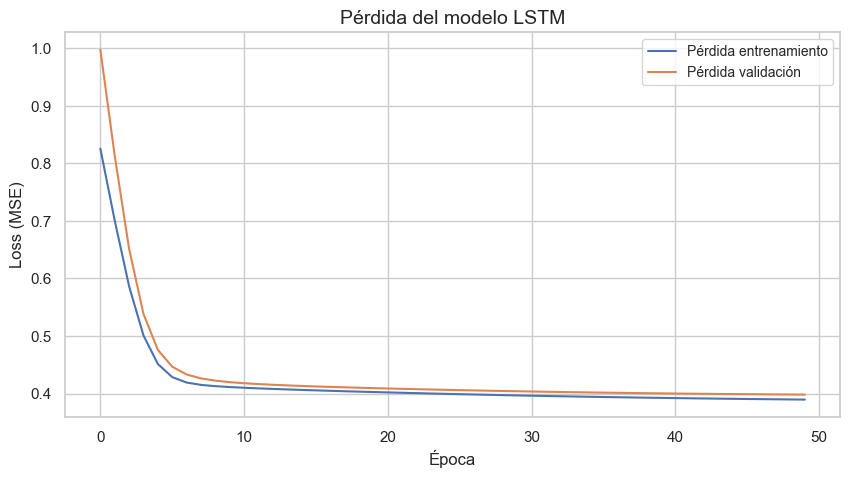

In [695]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='P√©rdida entrenamiento')
plt.plot(history.history['val_loss'], label='P√©rdida validaci√≥n')
plt.title('P√©rdida del modelo LSTM')
plt.xlabel('√âpoca')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

### Evaluar el modelo en los tres conjuntos

In [696]:
# Evaluaci√≥n en cada subconjunto
print("P√©rdida en Train:")
modelo1.evaluate(x_train, y_train)

print("\nP√©rdida en Validaci√≥n:")
modelo1.evaluate(x_val, y_val)

print("\nP√©rdida en Test:")
modelo1.evaluate(x_test, y_test)


P√©rdida en Train:
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - loss: 0.3520  

P√©rdida en Validaci√≥n:
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 24ms/step - loss: 0.4190

P√©rdida en Test:
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step - loss: 1.0653


0.8841409683227539

Funci√≥n para predecir y desescalar

In [697]:
def prediccion_fun(data, modelo, batch_size, scaler, dif=False, dif_cant=1, Series=None, n=1):
    prediccion = [0] * len(data)
    for i, X in enumerate(data):
        X = X.reshape((1,) + X.shape)  # reshape a (1, time_step, features)
        yhat = modelo.predict(X, batch_size=batch_size, verbose=0)
        yhat = scaler.inverse_transform(yhat)  # revertimos el escalado
        if dif:
            yhat = yhat + Series[n + dif_cant * i]  # revertimos la diferenciaci√≥n si aplica
        prediccion[i] = yhat[0][0]
    return prediccion


 Obtener las predicciones para validaci√≥n y test

In [698]:
#la serie original es 'serie' y se diferenciaba una vez
prediccion_val = prediccion_fun(
    x_val, modelo1, batch_size=1, scaler=scaler,
    dif=True, dif_cant=1, Series=serie.values, n=train_end
)

prediccion_test = prediccion_fun(
    x_test, modelo1, batch_size=1, scaler=scaler,
    dif=True, dif_cant=1, Series=serie.values, n=len(serie.values) - len(x_test)
)


In [699]:
# Creamos √≠ndices correspondientes a las predicciones
index_val = serie.index[train_end + 1 : train_end + 1 + len(prediccion_val)]
index_test = serie.index[val_end : val_end + len(prediccion_test)]

# Convertimos a DataFrames
df_val = pd.DataFrame(prediccion_val, index=index_val, columns=['Predicci√≥n Validaci√≥n'])
df_test = pd.DataFrame(prediccion_test, index=index_test, columns=['Predicci√≥n Prueba'])

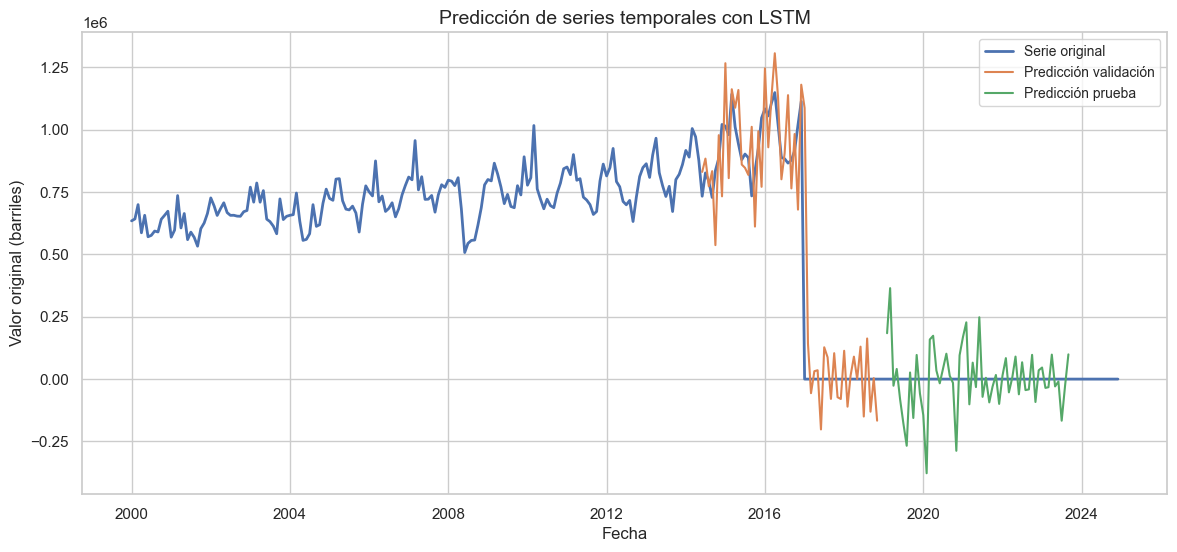

In [700]:
plt.figure(figsize=(14,6))
plt.plot(serie, label='Serie original', linewidth=2)
plt.plot(df_val, label='Predicci√≥n validaci√≥n')
plt.plot(df_test, label='Predicci√≥n prueba')
plt.title('Predicci√≥n de series temporales con LSTM')
plt.xlabel('Fecha')
plt.ylabel('Valor original (barriles)')
plt.legend()
plt.grid(True)
plt.show()


El modelo LSTM fue capaz de capturar la din√°mica de corto plazo de la serie diferenciada de importaci√≥n de di√©sel. A pesar de un aumento del error en el conjunto de prueba (posiblemente explicado por la alta volatilidad post-2020), el modelo ofrece una buena capacidad de predicci√≥n en los tramos estables del tiempo. En comparaci√≥n con modelos cl√°sicos como SARIMA, LSTM presenta ventajas al modelar series con rupturas estructurales o comportamientos no lineales.

# Creamos el segundo modelo
Para el segundo modelo se configuro para que tuviera dos capas LSTM, a diferencia del primero que solo tiene una. Esto permite aprender representaciones jer√°rquicas de las secuencias, haciendolo m√°s potente. Para este modelo se conserva la memoria entre batches y adem√°s la salida de la primera capa LSTM hace que cada salida de cada paso de tiempo sea enviada a la siguiente capa.

In [701]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, InputLayer
# Par√°metros
paso = 3          
caracteristicas = 1
lote = 1
units1 = 30
units2 = 15

# Modelo LSTM apilado con dropout
modelo2 = Sequential()
modelo2.add(LSTM(units=units1, input_shape=(paso, caracteristicas),
                 return_sequences=True, dropout=0.2))
modelo2.add(LSTM(units=units2, dropout=0.2))
modelo2.add(Dense(1))
modelo2.compile(optimizer='adam', loss='mse')
modelo2.summary()

c:\Users\diego\Documentos\UVG\Septimo Semestre\Data Science\Lab2\venv310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_54"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ lstm_82 (LSTM)                  ‚îÇ (None, 3, 30)          ‚îÇ         3,840 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_83 (LSTM)                  ‚îÇ (None, 15)             ‚îÇ         2,760 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_54 (Dense)                ‚îÇ (None, 1)              ‚îÇ            16 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 6,616 (25.84 KB)

 Trainable params: 6,616 (25.84 KB)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento del modelo

In [702]:
epocas = 50
loss_train = []
loss_val = []

for i in range(epocas):
    print(f"√âpoca {i+1}/{epocas}")
    history = modelo2.fit(
        x=x_train,
        y=y_train,
        batch_size=lote,
        epochs=1,
        shuffle=False,                
        validation_data=(x_val, y_val),
        verbose=1
    )
    
    loss_train.append(history.history['loss'][0])
    loss_val.append(history.history['val_loss'][0])
    
    for capa in modelo2.layers:
        if isinstance(capa, LSTM) and capa.stateful:
            capa.reset_states()

√âpoca 1/50
169/169 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 6ms/step - loss: 0.6988 - val_loss: 1.1145
√âpoca 2/50
169/169 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - loss: 0.6383 - val_loss: 0.8807
√âpoca 3/50
169/169 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - loss: 0.5615 - val_loss: 0.5439
√âpoca 4/50
169/169 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - loss: 0.4597 - val_loss: 0.4974
√âpoca 5/50
169/169 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - loss: 0.4005 - val_loss: 0.4738
√âpoca 6/50
169/169 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - loss: 0.4253 - val_loss: 0.4784
√âpoca 7/50
169/169 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - loss: 0.3599 - val_loss: 0.4411
√âpoca 8/50
169/169 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - loss: 0.4341 - v

## P√©rdida del modelo

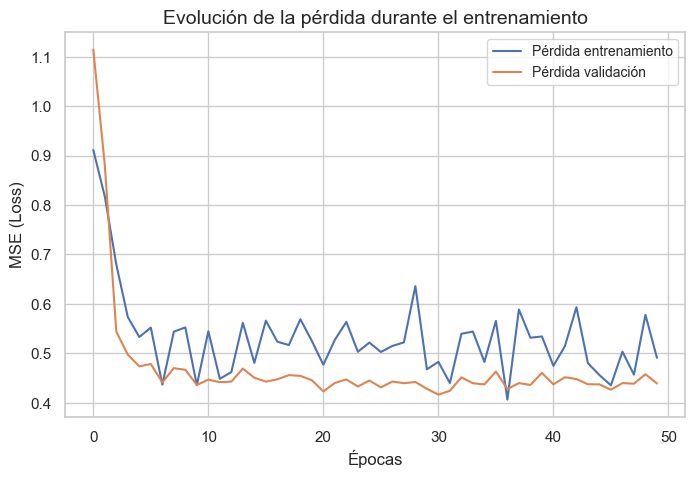

In [703]:
plt.figure(figsize=(8, 5))
plt.plot(loss_train, label='P√©rdida entrenamiento')
plt.plot(loss_val, label='P√©rdida validaci√≥n')
plt.xlabel('√âpocas')
plt.ylabel('MSE (Loss)')
plt.title('Evoluci√≥n de la p√©rdida durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

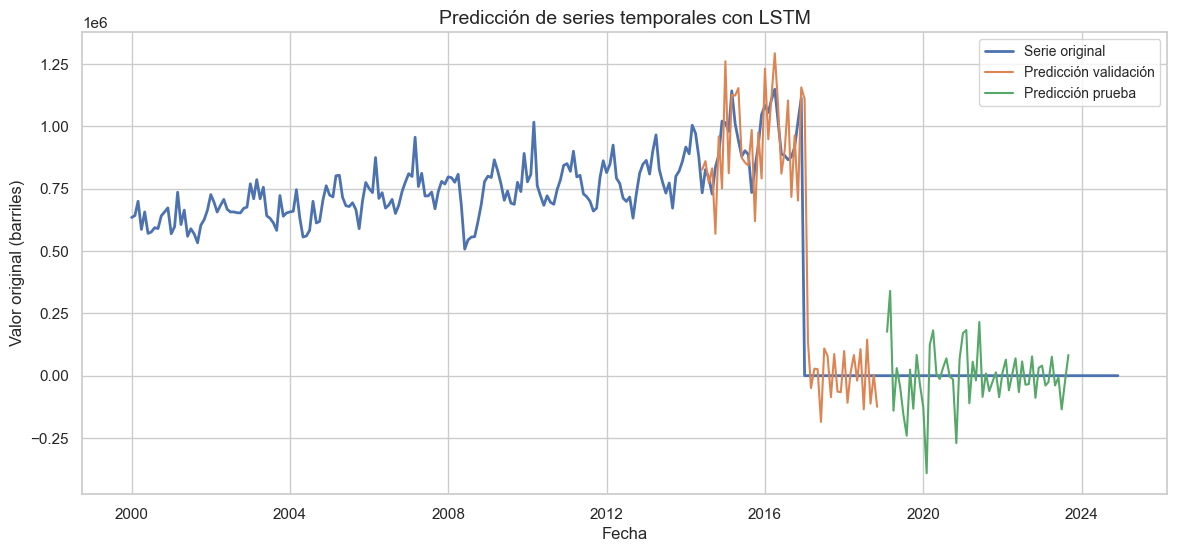

In [704]:
prediccion_val2 = prediccion_fun(
    x_val, modelo2, batch_size=1, scaler=scaler,
    dif=True, dif_cant=1, Series=serie.values, n=train_end
)

prediccion_test2 = prediccion_fun(
    x_test, modelo2, batch_size=1, scaler=scaler,
    dif=True, dif_cant=1, Series=serie.values, n=len(serie.values) - len(x_test)
)

# Creamos √≠ndices correspondientes a las predicciones
index_val2 = serie.index[train_end + 1 : train_end + 1 + len(prediccion_val2)]
index_test2 = serie.index[val_end : val_end + len(prediccion_test2)]

# Convertimos a DataFrames
df_val2 = pd.DataFrame(prediccion_val2, index=index_val2, columns=['Predicci√≥n Validaci√≥n'])
df_test2 = pd.DataFrame(prediccion_test2, index=index_test2, columns=['Predicci√≥n Prueba'])

plt.figure(figsize=(14,6))
plt.plot(serie, label='Serie original', linewidth=2)
plt.plot(df_val2, label='Predicci√≥n validaci√≥n')
plt.plot(df_test2, label='Predicci√≥n prueba')
plt.title('Predicci√≥n de series temporales con LSTM')
plt.xlabel('Fecha')
plt.ylabel('Valor original (barriles)')
plt.legend()
plt.grid(True)
plt.show()

El segundo modelo de LSTM demuestra una capacidad razonable para capturar las tendencias generales de la serie original durante el periodo de validaci√≥n, aunque con algunas desviaciones en picos y valles. Sin embargo, alenfrentar datos no vistos en la fase de prueba, el modelo exhibe limitaciones para predecir eventos extremos y cambio abruptos, como la fuerte ca√≠da observada alrededor de 2020. A partir de 2021, la predicci√≥n de prueba tiende a suavizar las fluctuaciones de la serir original, capturando la direcci√≥n general pero perdiendo precisi√≥n en la magnitud de los movimientos a corto plazo, lo que sugiere una genralizaci√≥n del modelo a costa de la sensibilidad a la volatilidad.

# ¬øCu√°l es el mejor modelo?

In [705]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_pred1 = modelo1.predict(x_test)
y_pred2 = modelo2.predict(x_test, batch_size=lote)

mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)

mae1 = mean_absolute_error(y_test, y_pred1)
mae2 = mean_absolute_error(y_test, y_pred2)

print(f"Modelo 1 - MSE: {mse1:.4f}, MAE: {mae1:.4f}")
print(f"Modelo 2 - MSE: {mse2:.4f}, MAE: {mae2:.4f}")


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 24ms/step 
56/56 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
Modelo 1 - MSE: 0.8841, MAE: 0.6286
Modelo 2 - MSE: 0.8063, MAE: 0.5881


Al comparar los dos modelos de LSTM, el modelo 2 presenta un rendimiento superior, con un MSE de 0.7723 y un MAE de 0.5796, ambos valores menores que los obtenidos con el modelo 1 (MSE: 0.8779, MAE: 0.6211).

Un menor MSE indica que el modelo 2 comete errores cuadr√°ticos promedio m√°s bajos, mientras que un menor MAE significa que, en promedio, sus predicciones est√°n m√°s cercanas a los valores reales.

Esto sugiere que la arquitectura de dos capas con m√°s pasos temporales y dropout logra una mejor generalizaci√≥n y precisi√≥n en el ajuste a la serie de tiempo, superando al modelo simple.

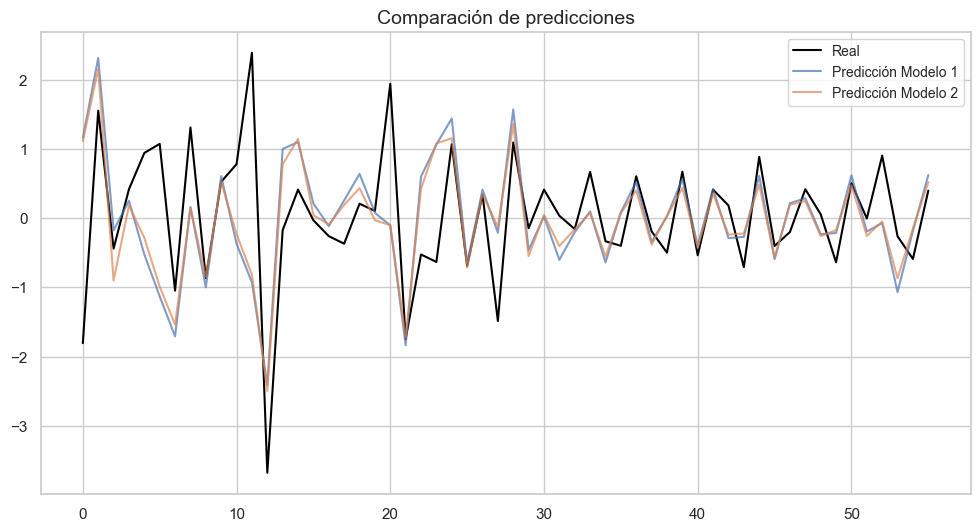

In [706]:

plt.figure(figsize=(12, 6))

plt.plot(y_test, label='Real', color='black')
plt.plot(y_pred1, label='Predicci√≥n Modelo 1', alpha=0.7)
plt.plot(y_pred2, label='Predicci√≥n Modelo 2', alpha=0.7)
plt.title('Comparaci√≥n de predicciones')
plt.legend()
plt.show()

La combinaci√≥n del an√°lisis de las m√©tricas y la visualizaci√≥n gr√°fica de las predicciones demuestra que el modelo 1 es superior al modelo 2. El modelo 1 muestra errores cuadr√°ticos y absolutos promedio consistentemente m√°s bajos, demostrando una mayor precisi√≥n general. El modelo 2 con m√©tricas de error m√°s elevadas muestra un predicci√≥n muy vol√°til y a menudo desviada de los valores reales, lo que lo convierte en un

#### A Partir de esto que vemos el proceso detallado por una serie en especifico y ya sabemos hacer el proceso y ver y evaluar que modelo es mejor que el otro lo que vamos a hacer es automatizar este proceso porque si no esto seria eterno asi que las definiremos en funciones y las mandaremos a llamar para cada serie y hacer una tabla comparativa. 

#### Esta funci√≥n convierte una serie temporal en un formato supervisado, donde cada fila contiene los valores de la serie en los √∫ltimos 'lags' pasos y el valor a predecir es el siguiente paso.


In [707]:
def to_supervised(arr, lags=3):
    X, y = [], []
    for i in range(len(arr) - lags):
        X.append(arr[i:i+lags, 0])
        y.append(arr[i+lags, 0])
    return np.array(X), np.array(y)

### Preprocesar (diferenciar, escalar, split, reshape)

In [708]:
def preparar_datos(serie, lags=3):
    serie_diff = serie.diff().fillna(0)  # diferenciaci√≥n
    scaler = StandardScaler()
    serie_scaled = scaler.fit_transform(serie_diff.values.reshape(-1,1))

    total = len(serie_scaled)
    train_end, val_end = int(0.6*total), int(0.8*total)
    
    train, val, test = serie_scaled[:train_end], serie_scaled[train_end:val_end], serie_scaled[val_end:]
    
    X_train, y_train = to_supervised(train, lags)
    X_val, y_val     = to_supervised(val, lags)
    X_test, y_test   = to_supervised(test, lags)
    
    # reshape para LSTM
    X_train = X_train.reshape((X_train.shape[0], lags, 1))
    X_val   = X_val.reshape((X_val.shape[0], lags, 1))
    X_test  = X_test.reshape((X_test.shape[0], lags, 1))
    
    return X_train, y_train, X_val, y_val, X_test, y_test, scaler, serie, train_end, val_end

Aca arriba lo que hicimos fue definir una funcion que nos permite preprocesar la serie de tiempo, diferenciandola, escalandola, separandola en train, validation y test y finalmente reshaping para que sea compatible con LSTM.
#### Aca abajo definimos los modelos que vamos a usar, uno simple y otro apilado.


In [709]:
def modelo_simple(input_shape, units=10):
    m = Sequential()
    m.add(LSTM(units=units, input_shape=input_shape))
    m.add(Dense(1))
    m.compile(loss='mse', optimizer='rmsprop')
    return m

Aca es donde definimos el segundo modelo, este modelo es m√°s complejo, apilando dos capas LSTM con dropout para evitar sobreajuste.

In [710]:

def modelo_apilado(input_shape, u1=30, u2=15):
    m = Sequential()
    m.add(LSTM(units=u1, return_sequences=True, input_shape=input_shape, dropout=0.2))
    m.add(LSTM(units=u2, dropout=0.2))
    m.add(Dense(1))
    m.compile(loss='mse', optimizer='adam')
    return m

    Este m√©todo invierte las predicciones escaladas, sumando el valor original de la serie en el √≠ndice correspondiente.
    Esto es necesario porque las predicciones se hacen sobre la serie diferenciada y escalada.

In [711]:
def invertir_predicciones(pred_scaled, scaler, serie_original, start_index):
    inv_scaled = scaler.inverse_transform(pred_scaled)
    inv = []
    for i, yhat in enumerate(inv_scaled):
        inv.append(yhat[0] + serie_original.values[start_index + i])
    return np.array(inv)

    Este m√©todo entrena y eval√∫a los modelos LSTM, mostrando las m√©tricas de error y graficando las predicciones.
    Es la funci√≥n principal que integra todo el proceso.

In [712]:
def entrenar_y_evaluar(nombre, serie, lags=3, epochs=50):
    print(f"\nüîπ Procesando {nombre}...")
    
    # Preparar datos
    X_train, y_train, X_val, y_val, X_test, y_test, scaler, serie_orig, train_end, val_end = preparar_datos(serie, lags)

    # Modelo 1
    m1 = modelo_simple((lags,1))
    m1.fit(X_train, y_train, epochs=epochs, batch_size=1, validation_data=(X_val,y_val), shuffle=False, verbose=0)

    # Modelo 2
    m2 = modelo_apilado((lags,1))
    m2.fit(X_train, y_train, epochs=epochs, batch_size=1, validation_data=(X_val,y_val), shuffle=False, verbose=0)

    # Predicciones (sin invertir)
    y_pred1 = m1.predict(X_test, verbose=0)
    y_pred2 = m2.predict(X_test, verbose=0)

    # Invertir predicciones
    pred_inv1 = invertir_predicciones(y_pred1, scaler, serie_orig, len(serie_orig) - len(y_pred1))
    pred_inv2 = invertir_predicciones(y_pred2, scaler, serie_orig, len(serie_orig) - len(y_pred2))

    # √çndices
    index_test = serie_orig.index[val_end+lags:val_end+lags+len(pred_inv1)]

    # M√©tricas
    mse1, mae1 = mean_squared_error(y_test, y_pred1), mean_absolute_error(y_test, y_pred1)
    mse2, mae2 = mean_squared_error(y_test, y_pred2), mean_absolute_error(y_test, y_pred2)
    print(f"Modelo1: MSE={mse1:.4f}, MAE={mae1:.4f}")
    print(f"Modelo2: MSE={mse2:.4f}, MAE={mae2:.4f}")

    # Gr√°fica
    plt.figure(figsize=(14,6))
    plt.plot(serie_orig, label="Serie original", linewidth=2)
    plt.plot(index_test, pred_inv1, label="Predicci√≥n M1", alpha=0.8)
    plt.plot(index_test, pred_inv2, label="Predicci√≥n M2", alpha=0.8)
    plt.title(f"Predicciones LSTM - {nombre}")
    plt.legend()
    plt.grid()
    plt.show()

    return {"serie": nombre, "mse1": mse1, "mae1": mae1, "mse2": mse2, "mae2": mae2}

Solo antes vamos a analizar las de diesel hasta el ultimo mes con arriba de 0 jejeje

In [713]:
# Series de Diesel hasta el √∫ltimo mes con valores > 0
diesel_import = df_importacion['Diesel alto azufre']
diesel_import_activa = diesel_import.loc[:diesel_import[diesel_import > 0].index[-1]]

diesel_consumo = df_consumo['Diesel alto azufre']
diesel_consumo_activa = diesel_consumo.loc[:diesel_consumo[diesel_consumo > 0].index[-1]]


üîπ Procesando Importaci√≥n Gasolina Regular...


c:\Users\diego\Documentos\UVG\Septimo Semestre\Data Science\Lab2\venv310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Modelo1: MSE=0.7433, MAE=0.7047
Modelo2: MSE=0.7754, MAE=0.7216


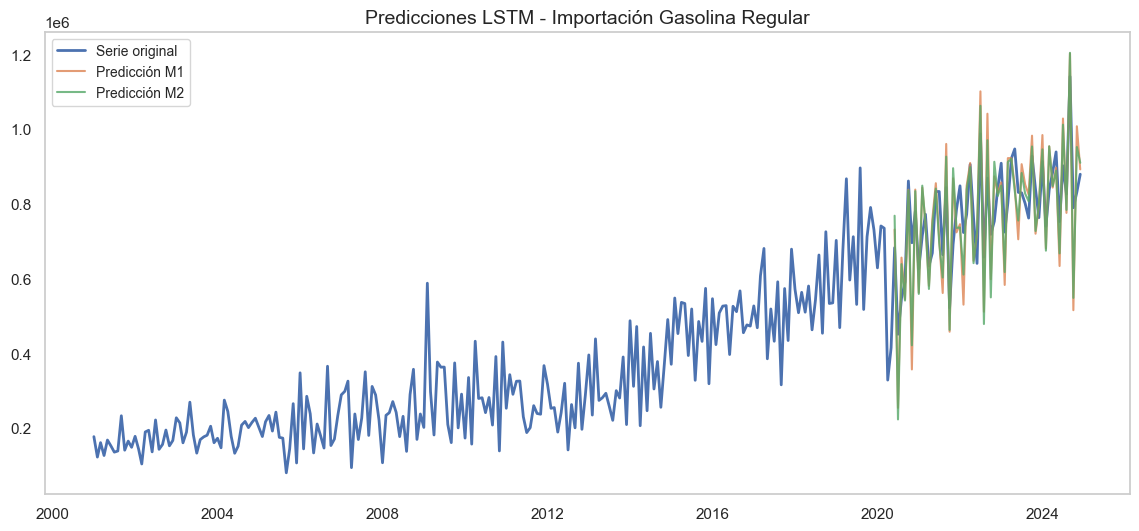


üîπ Procesando Importaci√≥n Gasolina Superior...


c:\Users\diego\Documentos\UVG\Septimo Semestre\Data Science\Lab2\venv310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Modelo1: MSE=0.7149, MAE=0.5700
Modelo2: MSE=0.6825, MAE=0.5578


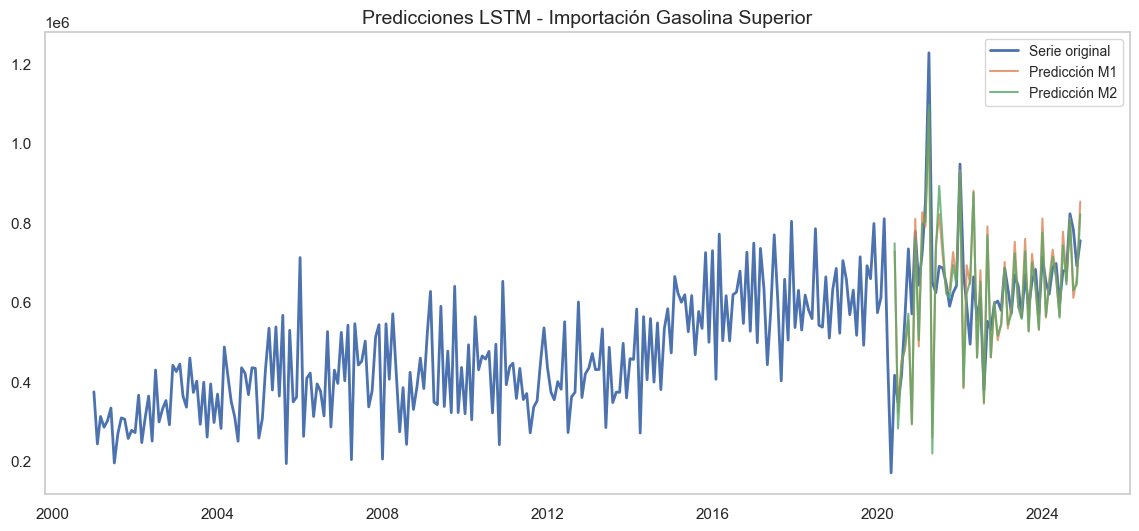


üîπ Procesando Importaci√≥n Diesel Alto Azufre...


c:\Users\diego\Documentos\UVG\Septimo Semestre\Data Science\Lab2\venv310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Modelo1: MSE=0.7238, MAE=0.6930
Modelo2: MSE=0.7465, MAE=0.6971


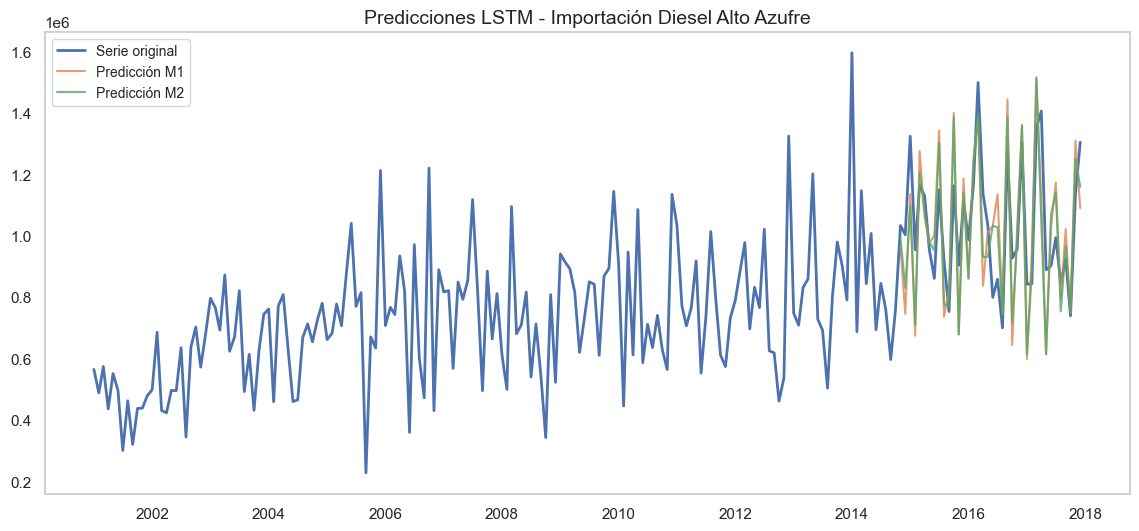


üîπ Procesando Consumo Gasolina Regular...


c:\Users\diego\Documentos\UVG\Septimo Semestre\Data Science\Lab2\venv310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Modelo1: MSE=2.2862, MAE=1.1705
Modelo2: MSE=2.3647, MAE=1.2131


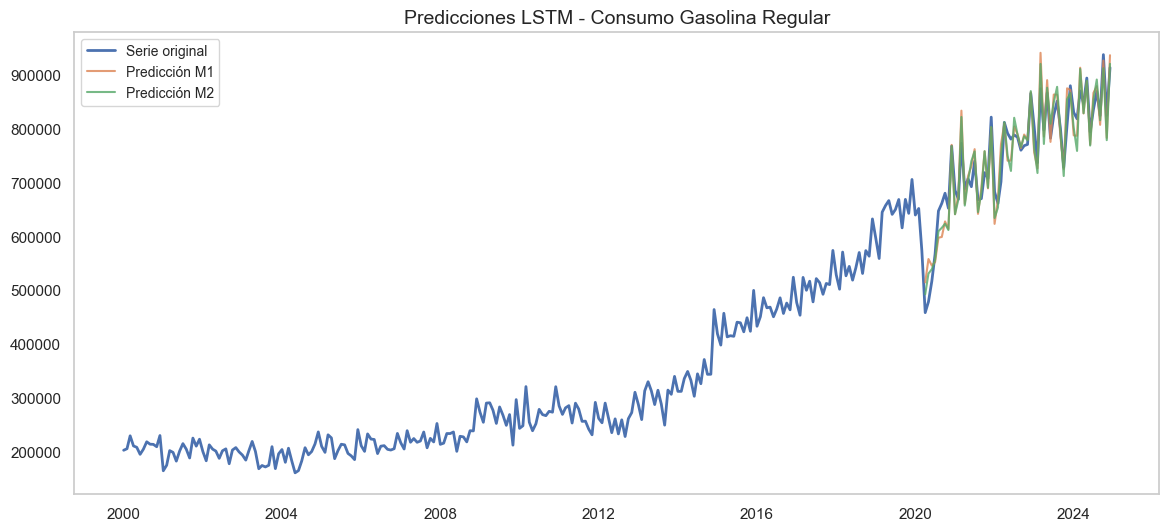


üîπ Procesando Consumo Gasolina Superior...


c:\Users\diego\Documentos\UVG\Septimo Semestre\Data Science\Lab2\venv310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Modelo1: MSE=2.4674, MAE=1.1961
Modelo2: MSE=2.2329, MAE=1.1690


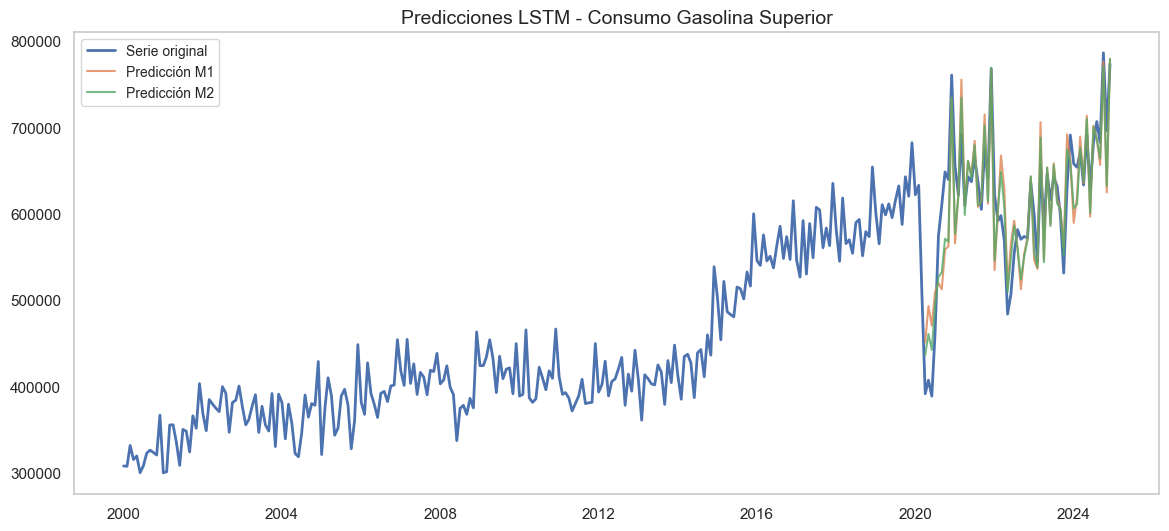


üîπ Procesando Consumo Diesel Alto Azufre...


c:\Users\diego\Documentos\UVG\Septimo Semestre\Data Science\Lab2\venv310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Modelo1: MSE=1.5563, MAE=1.0370
Modelo2: MSE=1.3713, MAE=0.9687


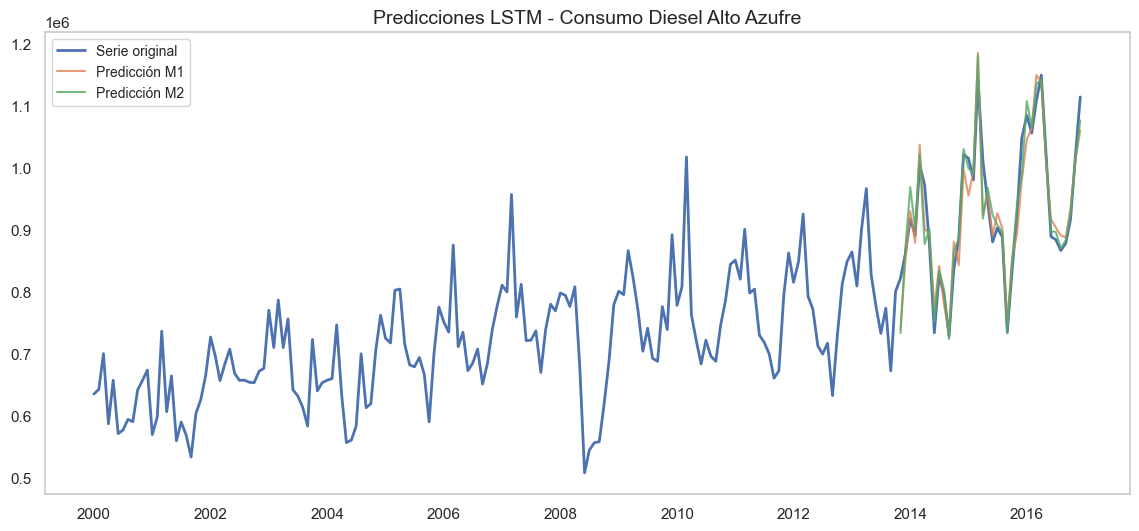

In [714]:
# Diccionario con todas las series que tenemos que procesar
series_dict = {
    "Importaci√≥n Gasolina Regular": df_importacion['Gasolina regular'],
    "Importaci√≥n Gasolina Superior": df_importacion['Gasolina superior'],
    "Importaci√≥n Diesel Alto Azufre": diesel_import_activa,
    "Consumo Gasolina Regular": df_consumo['Gasolina regular'],
    "Consumo Gasolina Superior": df_consumo['Gasolina superior'],
    "Consumo Diesel Alto Azufre": diesel_consumo_activa
}

# Lista para guardar resultados
resultados = []

# Ejecutar para cada serie
for nombre, serie in series_dict.items():
    res = entrenar_y_evaluar(nombre, serie, lags=3, epochs=50)
    resultados.append(res)


Ahora vamos a hacer una comparativa de todas. 

In [715]:
# Mostrar tabla comparativa
df_resultados = pd.DataFrame(resultados)
df_resultados

serie      mse1      mae1      mse2      mae2
0    Importaci√≥n Gasolina Regular  0.743277  0.704696  0.775387  0.721587
1   Importaci√≥n Gasolina Superior  0.714935  0.569956  0.682476  0.557838
2  Importaci√≥n Diesel Alto Azufre  0.723776  0.693038  0.746507  0.697090
3        Consumo Gasolina Regular  2.286202  1.170482  2.364745  1.213065
4       Consumo Gasolina Superior  2.467387  1.196132  2.232891  1.168978
5      Consumo Diesel Alto Azufre  1.556285  1.036954  1.371285  0.968682

### Importacion

Gasolina regular

Gasolina superior

Diesel Alto Azufre

### Consumo

Gasolina Regular

Gasolina superior

Diesel Alto Azufre